# Examples by A. Esposito

In [ ]:
#############################
# FEATURE SELECTION EXAMPLE #
#############################

# Select Target and Input variables from the dataframe
target_variable = 'grading'
input_variables = df.columns[df.columns!=target_variable]
X = df[input_variables]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, random_state=1234, shuffle=True)

# Create crossvalidation splits
crossvalidation = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

# Set grid search values
parameters = {’C’: np.logspace(np.log10(1e-2), np.log10(1e3), 51)}

# Instantiate and fit Grid Search
lasso = LogisticRegression(random_state=1234, solver="liblinear",penalty=’l1’,verbose=1)
lasso_gs = GridSearchCV(lasso, parameters, n_jobs=-1, cv=crossvalidation, scoring=’roc_auc’)
lasso_gs.fit(X_train ,y_train)

# Fit the model on the full dataset using the best estimator parameter
lasso = LogisticRegression(C=lasso_gs.best_estimator_.C, penalty=’l1’, random_state=5, solver=’liblinear’, verbose=1)
xval_score = cross_val_score(lasso,X_train,y_train,cv=crossvalidation)

# Fit the model on the full trainig set using the best estimator
lasso.fit(X_train ,y_train) yp = lasso.predict(X_test)

# Select the features with the largest feature importance (both negative and positive)
importances = lasso.coef_
indices = np.argsort(np.absolute(importances))[::-1]  #[0:100]
indices = indices[np.absolute(importances[indices]) >0.000001]
selected_features = X.columns[indices]

In [ ]:
###########################
# AR GRID SEARCH EXAMPLE #
###########################

support <- c(0.007, 0.01, 0.02, 0.05)
confidence <- c(0.5, 0.6, 0.7, 0.8, 0.9)
stats <- data.frame(support=double(), confidence=double(), pvalue=double(), rules=integer(),
stringsAsFactors=FALSE)
for(i in 1:length(support)) {
    for (j in 1:length(confidence)){
        #extract rules
        rules <- apriori(data = train,
                         parameter = list(supp=support[i], conf=confidence[j], minlen=2),
                         appearance = list(lhs = items, rhs=grep("grading=", itemLabels(trans), value = TRUE)),
                         control = list(verbose=T))
        #compute p-value
        quality(rules) <- cbind(quality(rules),
                                pvalue = interestMeasure(rules, measure="fishersExactTest",transactions=train, adjust='none', reuse=TRUE))
        #extract median lift and pvalue and store number of extracted rules
        pvalue <- median(quality(rules)\$pvalue)
        count <- length(rules)
        #add elements to dataframe
        stats <- rbind(stats, data.frame(support = support[i], confidence=confidence[j], pvalue = pvalue, lift = lift, count = count))
}}

In [ ]:
#####################
# AR MINING EXAMPLE #
#####################

# Mine all rules using apriori
rules <- apriori(data=train_trans,
                 parameter=list(supp=0.05, conf=0.8, minlen=2),
                 appearance = list(lhs = items , rhs="grading="),
                 control = list (verbose=T))

# Keep statistically significant rules on the train set, without correction
sig_rules <- rules[is.significant(red_rules, train, method='fisher', alpha=0.05, adjust='none')]

# Calculate p-value on the Test Set
quality(sig_rules) <- cbind(quality(sig_rules),
                            pvalue_test = interestMeasure(sig_rules, measure="fishersExactTest", transactions=test, adjust='none', reuse=FALSE))

# Select statistically significant rules, using Bonferroni correction
final_rules <- subset(sig_rules, pvalue_test < 0.05/length(sig_rules))  # Bonferroni = alpha/n_tests

# Association Rules background

R apriori [manual](https://cran.r-project.org/web/packages/arules/arules.pdf)

Statistics calculated over rules (antecedent X -> Y consequence)
1. Support: %X&Y
2. Confidence: %X&Y / %X = %X&Y/Supp(X)
3. Lift: %X&Y / (%X * %Y) = Conf(X&Y)/Supp(Y)
4. Coverage: %X = Supp(X)

[Reference](https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a), notation: % is always with respect to the total amount transactions

# ASP project: Regional analysis on COVID waves

Data was obtained from https://www.kaggle.com/federicocapello/covidlombardy

However, it got downloaded to be available from Drive

In [ ]:
# In case it hasn't been done before
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths
kaggle = '/content/drive/MyDrive/Tesi/ASPdataset.csv'

# Load data
%time kaggle = pd.read_csv(kaggle)
kaggle.head()

CPU times: user 5.52 ms, sys: 1.96 ms, total: 7.48 ms
Wall time: 10 ms


,NUTS,air_passengers,available_hospital_beds_nuts2,causes_of_death_crude_death_rate_3year_average_by_nuts2,compensation_of_employees_by_nuts2,deaths,early_leavers_from_education_and_training_by_sex_percentage_nuts2,employment_thousand_hours_worked_nuts2,farm_labour_force,health_personnel_by_nuts2,hospital_discharges_resp_diseases_j00_to_j99_nuts2,life_expectancy,longterm_care_beds_per_hundred_thousand_nuts2,nama_10r_2gdp,participation_in_education_and_training,pop_density,population_nuts2,pupils_and_students_enrolled_by_sex_age_and_nuts2,real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,stock_of_vehicles_by_category_and_nuts2,students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,unemployment_rate_nuts2,utilised_agricultural_area,young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2,binary_first_wave,binary_second_wave,multi_first_wave,multi_second_wave,cases_density_first_wave,cases_density_second_wave
0,AT11,NaN,587.21,1120.95,4305.0,3393.0,NaN,203160.0,6170.0,1277.0,3810.0,81.9,136.83,9272.61,9.3,77.8,294436.0,10538.0,107.5,254828.0,6750.0,4.2,181970.0,NaN,below_than_avg,higher_than_avg,low,medium,0.001539,0.038942
1,AT12,31635.0,671.36,1036.91,28451.0,17449.0,7.7,1179290.0,30660.0,7919.0,21247.0,81.7,179.09,61706.24,9.3,88.9,1684287.0,65453.0,108.0,1378944.0,33152.0,4.2,908850.0,7.0,below_than_avg,higher_than_avg,low,medium,0.002208,0.039038
2,AT13,NaN,751.91,857.68,48625.0,16150.0,10.6,1662610.0,2110.0,13078.0,29354.0,81.1,191.88,100347.32,16.5,4808.9,1911191.0,72870.0,108.4,799636.0,192471.0,10.6,8020.0,9.9,below_than_avg,higher_than_avg,medium,medium,0.003531,0.042492
3,AT21,210.0,803.93,1081.98,10099.0,6031.0,NaN,438030.0,7530.0,2722.0,10855.0,82.2,98.88,21505.55,10.1,59.9,561293.0,20566.0,109.3,438684.0,15527.0,4.7,220340.0,7.9,below_than_avg,higher_than_avg,low,medium,0.001083,0.049172
4,AT22,1035.0,801.30,1003.76,24503.0,12691.0,5.7,1023160.0,21440.0,6489.0,24310.0,82.2,85.65,50830.40,11.3,76.6,1246395.0,44991.0,109.6,947061.0,62035.0,4.4,375180.0,7.6,below_than_avg,higher_than_avg,low,medium,0.001845,0.041521


## Data exploration

In [ ]:
summary = kaggle.describe()

In [ ]:
print('Dataframe size: '+ str(kaggle.shape))

Dataframe size: (144, 30)


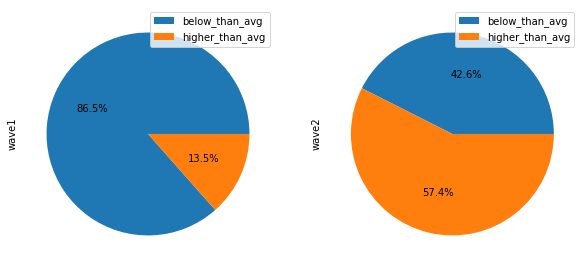

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,10))
kaggle.groupby(['binary_first_wave']).size().reset_index(name='wave1').plot.pie(y='wave1',
                                                                                labels=None,
                                                                                autopct='%1.1f%%', ax=axes[0])
axes[0].legend(labels=kaggle.groupby(['binary_first_wave']).size().reset_index(name='wave1').iloc[:,0])
kaggle.groupby(['binary_second_wave']).size().reset_index(name='wave2').plot.pie(y='wave2',
                                                                                 labels=None,
                                                                                 autopct='%1.1f%%', ax=axes[1])
axes[1].legend(labels=kaggle.groupby(['binary_second_wave']).size().reset_index(name='wave2').iloc[:,0])

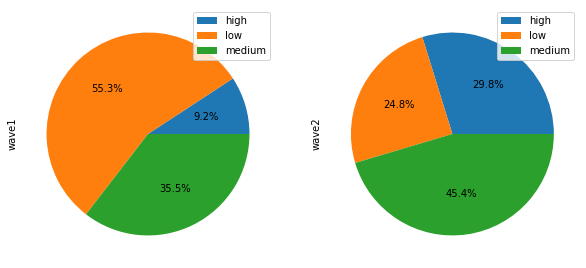

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,10))
kaggle.groupby(['multi_first_wave']).size().reset_index(name='wave1').plot.pie(y='wave1',
                                                                                   labels=None,
                                                                                   autopct='%1.1f%%', ax=axes[0])
axes[0].legend(labels=kaggle.groupby(['multi_first_wave']).size().reset_index(name='wave1').iloc[:,0])
kaggle.groupby(['multi_second_wave']).size().reset_index(name='wave2').plot.pie(y='wave2',
                                                                                    labels=None,
                                                                                    autopct='%1.1f%%', ax=axes[1])
axes[1].legend(labels=kaggle.groupby(['multi_second_wave']).size().reset_index(name='wave2').iloc[:,0])

We can find a more extreme behavior between regions on the first wave, that becomes more balanced on the second wave.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


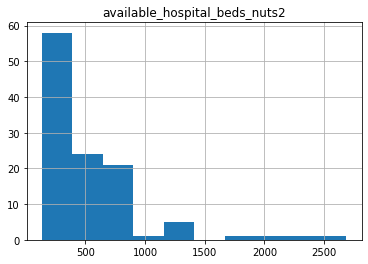

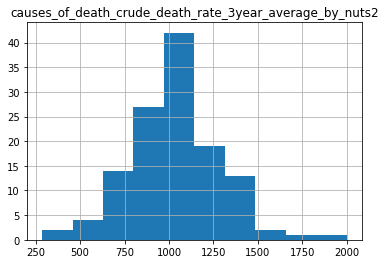

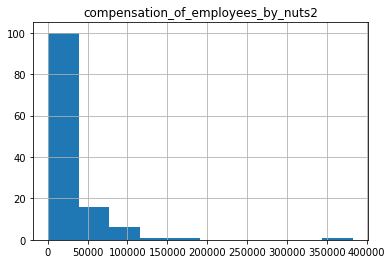

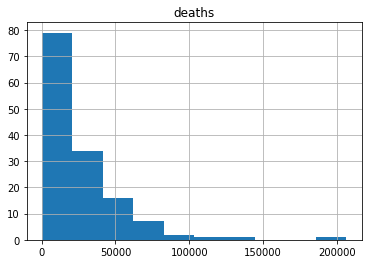

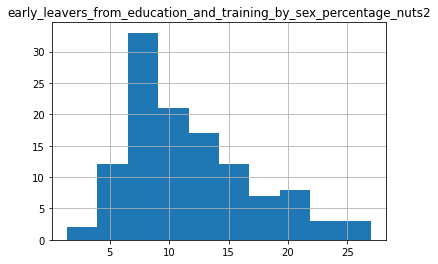

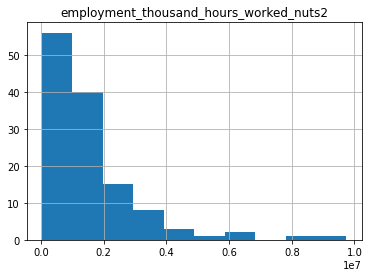

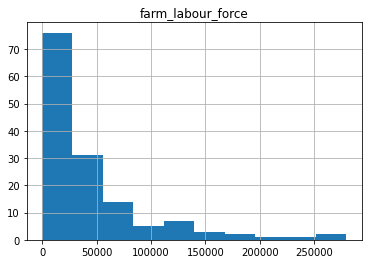

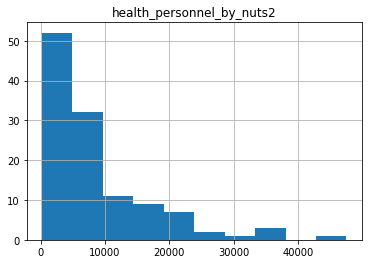

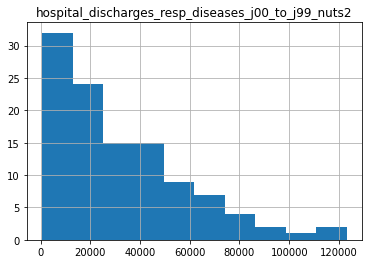

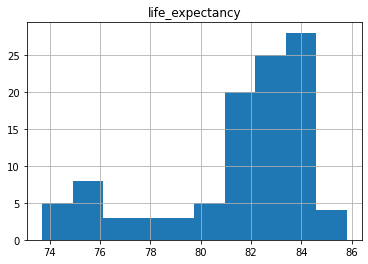

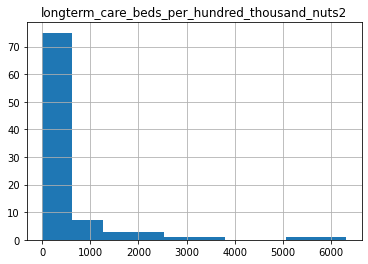

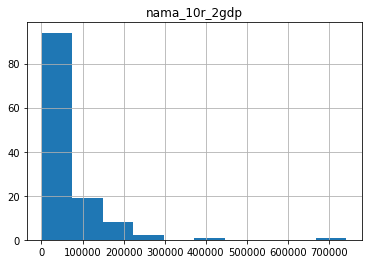

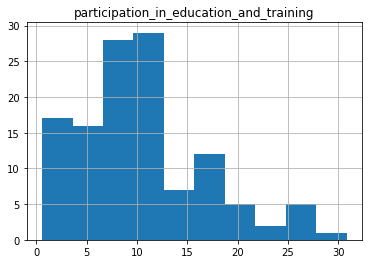

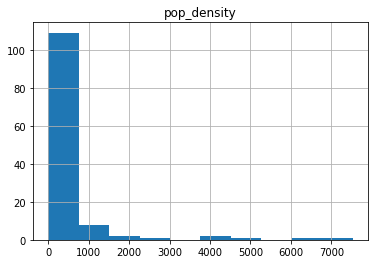

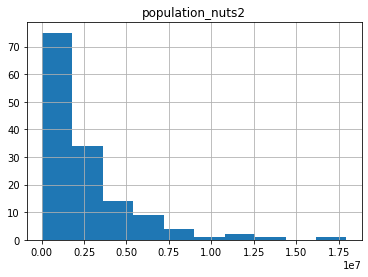

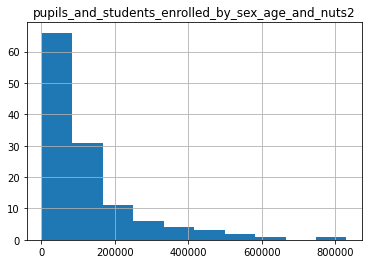

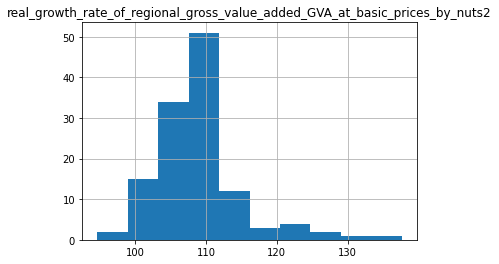

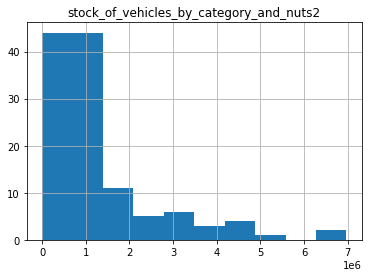

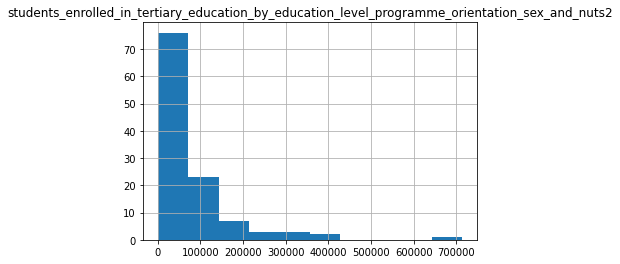

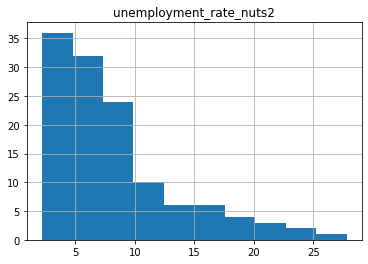

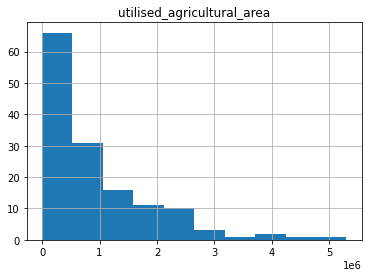

In [ ]:
for i in range(2,23):
  plt.figure(i)
  plt.title(kaggle.columns[i])
  kaggle.iloc[:, i].hist()

Given the behavior of the regional measures, classifying by below than average and higher than average could be a viable alternative to apply a procedure like before. Of course other alternatives for binary variables formulation that come from outlier detection are also a reasonable option.

We can consider the boxplots for a binary data format where 1 represents having the datum as an upper outlier, since we seem to only have those.

Also we can analyze if there are certain countries that are outliers or not in several fields. It could confirm some intuition gained by CAR mining.

0    34.751773
dtype: float64


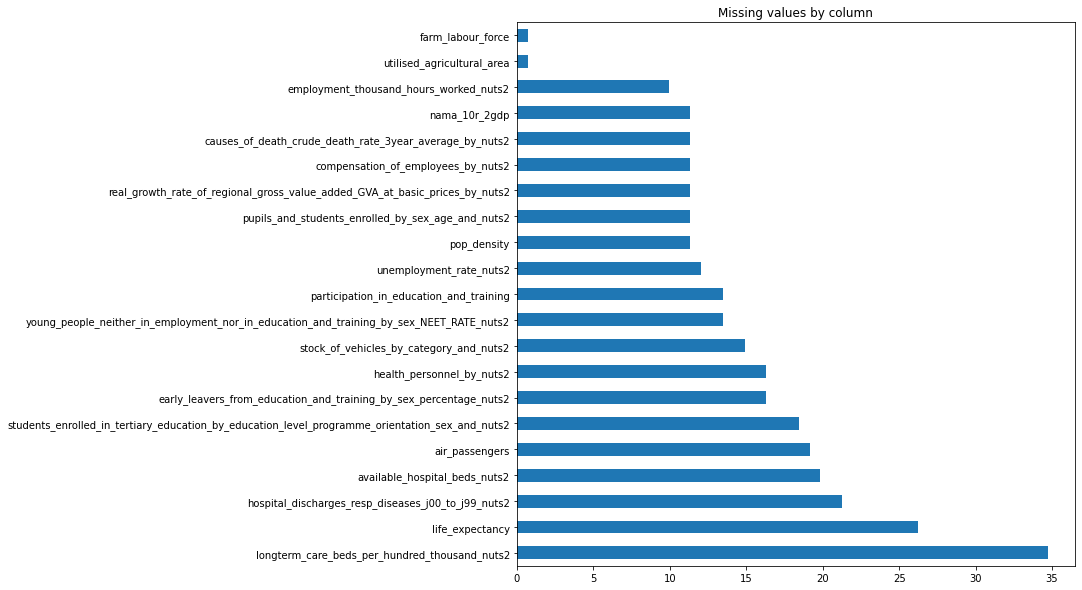

In [ ]:
nas = kaggle.iloc[:, ~kaggle.columns.isin(['binary_first_wave', 'binary_second_wave',
                                           'multi_first_wave', 'multi_second_wave'])].isnull().sum().sort_values(ascending=False)*100/len(kaggle)
nas = pd.DataFrame(nas[nas>0])

nas.plot.barh(rot= 0, legend=False, figsize=(10,10), title='Missing values by column')

print(nas.max())

87 0    60.0
dtype: float64


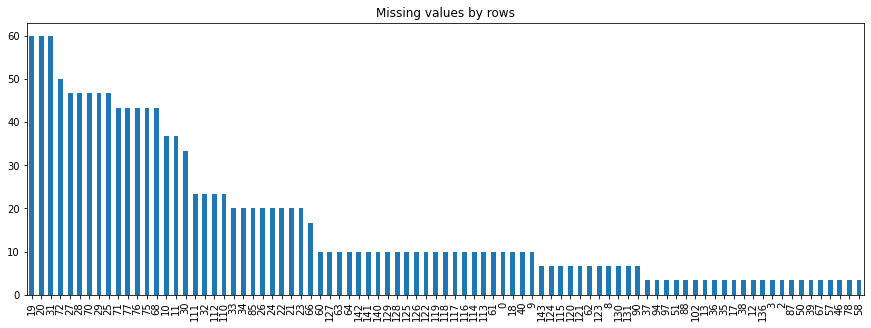

In [ ]:
aux = kaggle.T.isnull().sum().sort_values(ascending=False)*100/len(kaggle.T)
aux = pd.DataFrame(aux[aux>0])

print(len(aux), aux.max())

aux.plot.bar(rot= 90, legend=False, figsize=(15,5), title='Missing values by rows')

In [ ]:
kaggle.iloc[aux[aux > 40], :].isnull().sum().sort_values(ascending=False)*100/len(kaggle.iloc[aux[aux > 40], :])

air_passengers                                                                                    47.058824
health_personnel_by_nuts2                                                                         17.647059
hospital_discharges_resp_diseases_j00_to_j99_nuts2                                                17.647059
life_expectancy                                                                                   17.647059
early_leavers_from_education_and_training_by_sex_percentage_nuts2                                 11.764706
cases_density_second_wave                                                                          0.000000
cases_density_first_wave                                                                           0.000000
available_hospital_beds_nuts2                                                                      0.000000
causes_of_death_crude_death_rate_3year_average_by_nuts2                                            0.000000
compensation_of_employees_by

We can conclude that the most faulty columns when taking the most faulty regions are

1. air_passengers
2. health_personnel_by_nuts2
3. hospital_discharges_resp_diseases_j00_to_j99_nuts2
4. life_expectancy
5. early_leavers_from_education_and_training_by_sex_percentage_nuts2

However, regarding the whole data, the most faulty columns are
1. longterm_care_beds_per_hundred_thousand_nuts2
2. life_expectancy
3. hospital_discharges_resp_diseases_j00_to_j99_nuts2
4. available_hospital_beds_nuts2
5. air_passengers

Hence, there are columns where NaNs are spread over the regions, and columns where several regions have common NaNs.

When considering all the data, we need to double check these columns.

## Data transformation

In [ ]:
kaggle.dropna(subset=['cases_density_first_wave'], inplace=True)

In [ ]:
# 1 if it's over median, 0 otherwise
df = pd.DataFrame(kaggle['NUTS'])
#df['wave1_high'] = kaggle['binary_first_wave'].apply(lambda row: row == "higher_than_avg").astype("int64")
#df['wave1_low'] = kaggle['binary_first_wave'].apply(lambda row: row == "below_than_avg").astype("int64")
#df['wave2_high'] = kaggle['binary_second_wave'].apply(lambda row: row == "higher_than_avg").astype("int64")
#df['wave2_low'] = kaggle['binary_second_wave'].apply(lambda row: row == "below_than_avg").astype("int64")
#df['wave1_high'] = kaggle['cases_density_first_wave'].apply(lambda row: row >= kaggle['cases_density_first_wave'].median()).astype("int64")
#df['wave1_low'] = kaggle['cases_density_first_wave'].apply(lambda row: row < kaggle['cases_density_first_wave'].median()).astype("int64")
#df['wave2_high'] = kaggle['cases_density_second_wave'].apply(lambda row: row >= kaggle['cases_density_second_wave'].median()).astype("int64")
#df['wave2_low'] = kaggle['cases_density_second_wave'].apply(lambda row: row < kaggle['cases_density_second_wave'].median()).astype("int64")
df['wave1_high'] = kaggle['cases_density_first_wave'].apply(lambda row: row >= kaggle['cases_density_first_wave'].quantile(0.9)).astype("int64")
df['wave1_low'] = kaggle['cases_density_first_wave'].apply(lambda row: row < kaggle['cases_density_first_wave'].quantile(0.9)).astype("int64")
df['wave2_high'] = kaggle['cases_density_second_wave'].apply(lambda row: row >= kaggle['cases_density_second_wave'].quantile(0.9)).astype("int64")
df['wave2_low'] = kaggle['cases_density_second_wave'].apply(lambda row: row < kaggle['cases_density_second_wave'].quantile(0.9)).astype("int64")
df["over_" + kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column >= column.median()).astype("int64")
df["under_" + kaggle.columns[1:len(kaggle.columns)-6]] = 1 - df["over_" + kaggle.columns[1:len(kaggle.columns)-6]]
df

,NUTS,wave1_high,wave1_low,wave2_high,wave2_low,over_air_passengers,over_available_hospital_beds_nuts2,over_causes_of_death_crude_death_rate_3year_average_by_nuts2,over_compensation_of_employees_by_nuts2,over_deaths,over_early_leavers_from_education_and_training_by_sex_percentage_nuts2,over_employment_thousand_hours_worked_nuts2,over_farm_labour_force,over_health_personnel_by_nuts2,over_hospital_discharges_resp_diseases_j00_to_j99_nuts2,over_life_expectancy,over_longterm_care_beds_per_hundred_thousand_nuts2,over_nama_10r_2gdp,over_participation_in_education_and_training,over_pop_density,over_population_nuts2,over_pupils_and_students_enrolled_by_sex_age_and_nuts2,over_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,over_stock_of_vehicles_by_category_and_nuts2,over_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,over_unemployment_rate_nuts2,over_utilised_agricultural_area,over_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2,under_air_passengers,under_available_hospital_beds_nuts2,under_causes_of_death_crude_death_rate_3year_average_by_nuts2,under_compensation_of_employees_by_nuts2,under_deaths,under_early_leavers_from_education_and_training_by_sex_percentage_nuts2,under_employment_thousand_hours_worked_nuts2,under_farm_labour_force,under_health_personnel_by_nuts2,under_hospital_discharges_resp_diseases_j00_to_j99_nuts2,under_life_expectancy,under_longterm_care_beds_per_hundred_thousand_nuts2,under_nama_10r_2gdp,under_participation_in_education_and_training,under_pop_density,under_population_nuts2,under_pupils_and_students_enrolled_by_sex_age_and_nuts2,under_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,under_stock_of_vehicles_by_category_and_nuts2,under_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,under_unemployment_rate_nuts2,under_utilised_agricultural_area,under_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2
0,AT11,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,AT12,0,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1
2,AT13,0,1,0,1,0,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1
3,AT21,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1
4,AT22,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RO42,0,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0
140,SK01,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1
141,SK02,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1
142,SK03,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1


In [ ]:
# 1 if it's outlier, 0 otherwise
def dichotomize():
  df1 = pd.DataFrame(kaggle['NUTS'])
  df1[kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column < column.quantile(0.25))
  df2 = pd.DataFrame(kaggle['NUTS'])
  df2[kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column > column.quantile(0.75))
  df = pd.DataFrame(kaggle['NUTS'])
  #df['wave1_high'] = kaggle['binary_first_wave'].apply(lambda row: row == "higher_than_avg").astype("int64")
  #df['wave1_low'] = kaggle['binary_first_wave'].apply(lambda row: row == "below_than_avg").astype("int64")
  #df['wave2_high'] = kaggle['binary_second_wave'].apply(lambda row: row == "higher_than_avg").astype("int64")
  #df['wave2_low'] = kaggle['binary_second_wave'].apply(lambda row: row == "below_than_avg").astype("int64")
  df['wave1_high'] = kaggle['cases_density_first_wave'].apply(lambda row: row >= kaggle['cases_density_first_wave'].median()).astype("int64")
  #df['wave1_low'] = kaggle['cases_density_first_wave'].apply(lambda row: row < kaggle['cases_density_first_wave'].median()).astype("int64")
  df['wave2_high'] = kaggle['cases_density_second_wave'].apply(lambda row: row >= kaggle['cases_density_second_wave'].median()).astype("int64")
  #df['wave2_low'] = kaggle['cases_density_second_wave'].apply(lambda row: row < kaggle['cases_density_second_wave'].median()).astype("int64")
  #df['wave1_high'] = kaggle['cases_density_first_wave'].apply(lambda row: row >= kaggle['cases_density_first_wave'].quantile(0.9)).astype("int64")
  #df['wave1_low'] = kaggle['cases_density_first_wave'].apply(lambda row: row < kaggle['cases_density_first_wave'].quantile(0.9)).astype("int64")
  #df['wave2_high'] = kaggle['cases_density_second_wave'].apply(lambda row: row >= kaggle['cases_density_second_wave'].quantile(0.9)).astype("int64")
  #df['wave2_low'] = kaggle['cases_density_second_wave'].apply(lambda row: row < kaggle['cases_density_second_wave'].quantile(0.9)).astype("int64")
  #df["out_" + kaggle.columns[1:len(kaggle.columns)-6]] = df1[kaggle.columns[1:len(kaggle.columns)-6]] | df2[kaggle.columns[1:len(kaggle.columns)-6]]
  #df["out_" + kaggle.columns[1:len(kaggle.columns)-6]] = df["out_" + kaggle.columns[1:len(kaggle.columns)-6]].astype("int64")
  df["up_out_" + kaggle.columns[1:len(kaggle.columns)-6]] = df1[kaggle.columns[1:len(kaggle.columns)-6]]
  df["up_out_" + kaggle.columns[1:len(kaggle.columns)-6]] = df["up_out_" + kaggle.columns[1:len(kaggle.columns)-6]].astype("int64")
  df["do_out_" + kaggle.columns[1:len(kaggle.columns)-6]] = df2[kaggle.columns[1:len(kaggle.columns)-6]]
  df["do_out_" + kaggle.columns[1:len(kaggle.columns)-6]] = df["do_out_" + kaggle.columns[1:len(kaggle.columns)-6]].astype("int64")
  #df["not_"+kaggle.columns[1:len(kaggle.columns)-6]] = 1 - df["out_" + kaggle.columns[1:len(kaggle.columns)-6]]
  return df
dfd = dichotomize()
dfd

,NUTS,wave1_high,wave2_high,up_out_air_passengers,up_out_available_hospital_beds_nuts2,up_out_causes_of_death_crude_death_rate_3year_average_by_nuts2,up_out_compensation_of_employees_by_nuts2,up_out_deaths,up_out_early_leavers_from_education_and_training_by_sex_percentage_nuts2,up_out_employment_thousand_hours_worked_nuts2,up_out_farm_labour_force,up_out_health_personnel_by_nuts2,up_out_hospital_discharges_resp_diseases_j00_to_j99_nuts2,up_out_life_expectancy,up_out_longterm_care_beds_per_hundred_thousand_nuts2,up_out_nama_10r_2gdp,up_out_participation_in_education_and_training,up_out_pop_density,up_out_population_nuts2,up_out_pupils_and_students_enrolled_by_sex_age_and_nuts2,up_out_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,up_out_stock_of_vehicles_by_category_and_nuts2,up_out_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,up_out_unemployment_rate_nuts2,up_out_utilised_agricultural_area,up_out_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2,do_out_air_passengers,do_out_available_hospital_beds_nuts2,do_out_causes_of_death_crude_death_rate_3year_average_by_nuts2,do_out_compensation_of_employees_by_nuts2,do_out_deaths,do_out_early_leavers_from_education_and_training_by_sex_percentage_nuts2,do_out_employment_thousand_hours_worked_nuts2,do_out_farm_labour_force,do_out_health_personnel_by_nuts2,do_out_hospital_discharges_resp_diseases_j00_to_j99_nuts2,do_out_life_expectancy,do_out_longterm_care_beds_per_hundred_thousand_nuts2,do_out_nama_10r_2gdp,do_out_participation_in_education_and_training,do_out_pop_density,do_out_population_nuts2,do_out_pupils_and_students_enrolled_by_sex_age_and_nuts2,do_out_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,do_out_stock_of_vehicles_by_category_and_nuts2,do_out_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,do_out_unemployment_rate_nuts2,do_out_utilised_agricultural_area,do_out_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2
0,AT11,0,1,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AT12,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AT13,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0
3,AT21,0,1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AT22,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RO42,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
140,SK01,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
141,SK02,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,SK03,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
dfd.groupby(['wave2_high']).size()

wave2_high
0    70
1    71
dtype: int64

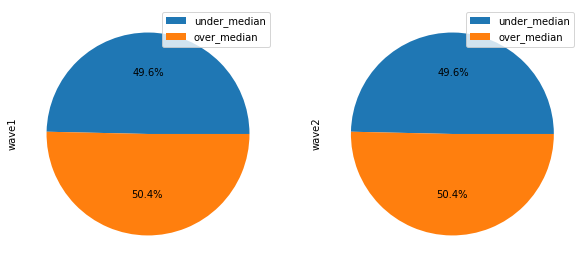

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,10))
dfd.groupby(['wave1_high']).size().reset_index(name='wave1').plot.pie(y='wave1', labels=None,
                                                                         autopct='%1.1f%%', ax=axes[0])
axes[0].legend(labels=['under_median', 'over_median'])
dfd.groupby(['wave2_high']).size().reset_index(name='wave2').plot.pie(y='wave2', labels=None,
                                                                         autopct='%1.1f%%', ax=axes[1])
axes[1].legend(labels=['under_median', 'over_median'])

## Rules mining

### Functions

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('arules', verbose=F, quiet=T)
library(arules)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘arules’


R[write to console]: The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
%%R

genes_to_transactions <- function(data){
  # Data formatting and collecting
  names_data <- names(data[-c(1)])
  matrix_data <- matrix(unlist(data[-c(1)]), ncol=dim(data[-c(1)])[2], nrow=dim(data[-c(1)])[1])
  colnames(matrix_data) <- names_data
  # Use the constructor to create transactions
  trans <- transactions(matrix_data)
  return(trans)
}

In [ ]:
%%R

grid_search <- function(dat, lab){
  supports <- c(0.02, 0.05, 0.1, 0.2)  # 0.007, 0.01 give too many rules in general
  confidences <- c(0.6, 0.7, 0.8, 0.9)  # 0.5 gives too many rules in general
  stats <- data.frame(support=double(), confidence=double(), pvalue=double(), rules=integer(), stringsAsFactors=F)
  for(i in 1:length(supports)){
      for(j in 1:length(confidences)){
          #extract rules
          mined_rules <- apriori(data = dat,
                           parameter = list(supp=supports[i], conf=confidences[j], minlen=3),
                           appearance = list(rhs=grep(lab, itemLabels(dat), value=TRUE)),  # no lhs or crashes
                           control = list(verbose=F))
          #compute p-value
          quality(mined_rules) <- cbind(quality(mined_rules),
                                  pval = interestMeasure(mined_rules, measure="fishersExactTest", transactions=dat, reuse=TRUE))  # adjust='none'
          #extract median lift and pvalue and store number of extracted rules
          pval <- median(quality(mined_rules)$pval)  # no \ for \$pval
          lifting <- median(quality(mined_rules)$lift)  # added because there wasn't
          counter <- length(mined_rules)
          #add elements to dataframe
          stats <- rbind(stats, data.frame(support=supports[i], confidence=confidences[j], pvalue=pval, lift=lifting, count=counter))
  }}
  return(stats)
}

In [ ]:
%%R

ar_mine <- function(train, sup, con, lab){
  # Mine all rules using apriori
  rules <- apriori(data = train,
                  parameter = list(supp=sup, conf=con, minlen=3),
                  appearance = list(rhs=grep(lab, itemLabels(train), value=TRUE)),  # no lhs = items ,
                  control = list(verbose=F))
  # Keep statistically significant rules on the train set, without correction
  sig_rules <- rules[is.significant(rules, train, method='fisher', alpha=0.05, adjust='none')]
  # Calculate p-value on the Test Set
  quality(sig_rules) <- cbind(quality(sig_rules),
                            pvalue_test = interestMeasure(sig_rules, measure="fishersExactTest", transactions=train, reuse=FALSE))  # adjust='none',
  # Select statistically significant rules, using Bonferroni correction
  final_rules <- subset(sig_rules, pvalue_test < 0.05/length(sig_rules))  # Bonferroni = alpha/n_tests
  print('Mining successful')
  return(final_rules)
}

### Median rules

In [ ]:
df1 = df.drop(['wave2_high', 'wave2_low'], axis=1)
df2 = df.drop(['wave1_high', 'wave1_low'], axis=1)

%R -i df1
%R -i df2

In [ ]:
df1 = df[['wave1_high', 'wave1_low']+m_cols1.to_list()]
df2 = df[['wave2_high', 'wave2_low']+m_cols2.to_list()]

%R -i df1
%R -i df2

In [ ]:
%%R
med_1 <- genes_to_transactions(df1)
med_2 <- genes_to_transactions(df2)
#inspect(med_1)

In [ ]:
%%time

%R grid_search(med_1, "wave1_high")

CPU times: user 7.28 s, sys: 115 ms, total: 7.39 s
Wall time: 7.36 s


,support,confidence,pvalue,lift,count
1,0.02,0.6,0.008693,5.64,10890
2,0.02,0.7,0.003720,7.05,3981
3,0.02,0.8,0.000405,7.52,163
4,0.02,0.9,NaN,NaN,0
5,0.05,0.6,NaN,NaN,0
6,0.05,0.7,NaN,NaN,0
7,0.05,0.8,NaN,NaN,0
8,0.05,0.9,NaN,NaN,0
9,0.10,0.6,NaN,NaN,0
10,0.10,0.7,NaN,NaN,0


In [ ]:
%%R

m1h <- ar_mine(med_1, 0.028365, 0.8, "wave1_high")
# 0.1, 0.9 keeps 392 / 642 -> 1.056e-07 - 6.617e-05
# 0.2, 0.8 keeps 1 / 1 -> 2.041e-05

summary(m1h)
#inspect(m1h)

[1] "Mining successful"
set of 0 rules



In [ ]:
%%time

%R grid_search(med_1, "wave1_low")

CPU times: user 14.9 s, sys: 1.12 s, total: 16.1 s
Wall time: 16 s


,support,confidence,pvalue,lift,count
1,0.02,0.6,0.912246,0.895238,595201
2,0.02,0.7,0.711771,1.119048,490610
3,0.02,0.8,0.634405,1.119048,329265
4,0.02,0.9,0.564944,1.119048,270474
5,0.05,0.6,0.966218,0.879252,126979
6,0.05,0.7,0.943736,0.895238,106919
7,0.05,0.8,0.396773,1.119048,57490
8,0.05,0.9,0.352024,1.119048,35390
9,0.10,0.6,0.985697,0.864719,10772
10,0.10,0.7,0.985697,0.866359,10341


In [ ]:
%%R

m1l <- ar_mine(med_1, 0.25, 0.9, "wave1_low")

summary(m1l)
#inspect(m1l)

[1] "Mining successful"
set of 3 rules

rule length distribution (lhs + rhs):sizes
3 4 
2 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   3.333   3.500   4.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.2837   Min.   :0.9833   Min.   :0.2837   Min.   :1.100  
 1st Qu.:0.3440   1st Qu.:0.9917   1st Qu.:0.3440   1st Qu.:1.110  
 Median :0.4043   Median :1.0000   Median :0.4043   Median :1.119  
 Mean   :0.3688   Mean   :0.9944   Mean   :0.3712   Mean   :1.113  
 3rd Qu.:0.4113   3rd Qu.:1.0000   3rd Qu.:0.4149   3rd Qu.:1.119  
 Max.   :0.4184   Max.   :1.0000   Max.   :0.4255   Max.   :1.119  
     count       pvalue_test      
 Min.   :40.0   Min.   :0.000242  
 1st Qu.:48.5   1st Qu.:0.001081  
 Median :57.0   Median :0.001921  
 Mean   :52.0   Mean   :0.002342  
 3rd Qu.:58.0   3rd Qu.:0.003392  
 Max.   :59.0   Max.   :0.004862  

mining info:
  data ntransactions support confidence
 tr

In [ ]:
%%time

%R grid_search(med_2, "wave2_high")

CPU times: user 7.38 s, sys: 55.8 ms, total: 7.44 s
Wall time: 7.41 s


,support,confidence,pvalue,lift,count
1,0.02,0.6,0.008693,5.64,755
2,0.02,0.7,0.003720,7.05,47
3,0.02,0.8,NaN,NaN,0
4,0.02,0.9,NaN,NaN,0
5,0.05,0.6,NaN,NaN,0
6,0.05,0.7,NaN,NaN,0
7,0.05,0.8,NaN,NaN,0
8,0.05,0.9,NaN,NaN,0
9,0.10,0.6,NaN,NaN,0
10,0.10,0.7,NaN,NaN,0


In [ ]:
%%R

m2h <- ar_mine(med_2, 0.021276, 0.7, "wave2_high")

summary(m2h)
#inspect(m2h)

[1] "Mining successful"
set of 0 rules



In [ ]:
%%time

%R grid_search(med_2, "wave2_low")

CPU times: user 17 s, sys: 352 ms, total: 17.4 s
Wall time: 17.3 s


,support,confidence,pvalue,lift,count
1,0.02,0.6,0.837724,0.959184,632086
2,0.02,0.7,0.796879,0.979167,581868
3,0.02,0.8,0.712048,1.007143,467260
4,0.02,0.9,0.634405,1.119048,243692
5,0.05,0.6,0.754763,0.994709,155610
6,0.05,0.7,0.754763,0.994709,154176
7,0.05,0.8,0.712048,1.001253,124589
8,0.05,0.9,0.626974,1.025794,61910
9,0.10,0.6,0.836789,0.959184,19363
10,0.10,0.7,0.836789,0.959184,19355


In [ ]:
%%R

m2l <- ar_mine(med_2, 0.25, 0.9, "wave2_low")

summary(m2l)
#inspect(m2l)

[1] "Mining successful"
set of 3 rules

rule length distribution (lhs + rhs):sizes
3 
3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.2837   Min.   :0.9825   Min.   :0.2837   Min.   :1.099  
 1st Qu.:0.2872   1st Qu.:0.9912   1st Qu.:0.2872   1st Qu.:1.109  
 Median :0.2908   Median :1.0000   Median :0.2908   Median :1.119  
 Mean   :0.3239   Mean   :0.9942   Mean   :0.3262   Mean   :1.113  
 3rd Qu.:0.3440   3rd Qu.:1.0000   3rd Qu.:0.3475   3rd Qu.:1.119  
 Max.   :0.3972   Max.   :1.0000   Max.   :0.4043   Max.   :1.119  
     count        pvalue_test      
 Min.   :40.00   Min.   :0.003198  
 1st Qu.:40.50   1st Qu.:0.003669  
 Median :41.00   Median :0.004140  
 Mean   :45.67   Mean   :0.004067  
 3rd Qu.:48.50   3rd Qu.:0.004501  
 Max.   :56.00   Max.   :0.004862  

mining info:
  data ntransactions support confidence


### Outlier rules

In [ ]:
# No LASSO
dfd1 = dfd.drop(['wave2_high', 'wave2_low'], axis=1)
dfd2 = dfd.drop(['wave1_high', 'wave1_low'], axis=1)

%R -i dfd1
%R -i dfd2

In [ ]:
# LASSO
dfd1 = dfd[['wave1_high', 'wave1_low']+o_cols1.to_list()]
dfd2 = dfd[['wave2_high', 'wave2_low']+o_cols2.to_list()]

%R -i dfd1
%R -i dfd2

In [ ]:
%%R
out_1 <- genes_to_transactions(dfd1)
out_2 <- genes_to_transactions(dfd2)

In [ ]:
%%time

%R grid_search(out_1, "wave1_high")

CPU times: user 191 ms, sys: 10 ms, total: 201 ms
Wall time: 204 ms


,support,confidence,pvalue,lift,count
1,0.02,0.6,NaN,NaN,0
2,0.02,0.7,NaN,NaN,0
3,0.02,0.8,NaN,NaN,0
4,0.02,0.9,NaN,NaN,0
5,0.05,0.6,NaN,NaN,0
6,0.05,0.7,NaN,NaN,0
7,0.05,0.8,NaN,NaN,0
8,0.05,0.9,NaN,NaN,0
9,0.10,0.6,NaN,NaN,0
10,0.10,0.7,NaN,NaN,0


In [ ]:
%%R

o1h <- ar_mine(out_1, 0.02, 0.9, "wave1_high")
# 0.05, 0.9 keeps 5 / 32 rules
# 0.1, 0.8 keeps 5 / 5 rules

summary(o1h)
#inspect(o1h)

[1] "Mining successful"
set of 10 rules

rule length distribution (lhs + rhs):sizes
4 5 6 
5 4 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0     4.0     4.5     4.6     5.0     6.0 

summary of quality measures:
    support          confidence    coverage            lift      
 Min.   :0.02083   Min.   :1    Min.   :0.02083   Min.   :7.579  
 1st Qu.:0.02083   1st Qu.:1    1st Qu.:0.02083   1st Qu.:7.579  
 Median :0.02083   Median :1    Median :0.02083   Median :7.579  
 Mean   :0.02292   Mean   :1    Mean   :0.02292   Mean   :7.579  
 3rd Qu.:0.02604   3rd Qu.:1    3rd Qu.:0.02604   3rd Qu.:7.579  
 Max.   :0.02778   Max.   :1    Max.   :0.02778   Max.   :7.579  
     count       pvalue_test       
 Min.   :3.00   Min.   :0.0002256  
 1st Qu.:3.00   1st Qu.:0.0006663  
 Median :3.00   Median :0.0019883  
 Mean   :3.30   Mean   :0.0014595  
 3rd Qu.:3.75   3rd Qu.:0.0019883  
 Max.   :4.00   Max.   :0.0019883  

mining info:
  data ntransactions support confidence
 trai

In [ ]:
%%R

derp <- c(LIST(o1h[2]@lhs[1], decode = TRUE)[[1]], LIST(o1h[6]@lhs, decode = TRUE)[[1]], LIST(o1h[8]@lhs, decode = TRUE)[[1]])
feats <- unique(derp)
dfd_test <- dfd1[c('NUTS', 'wave1_high', 'wave1_low', feats)]
out_test <- genes_to_transactions(dfd_test)
o1h_test <- apriori(data = out_test,
                  parameter = list(supp=0.02, conf=0.06, minlen=6),
                  appearance = list(rhs=grep('wave1_high', itemLabels(out_test), value=TRUE)),  # no lhs = items ,
                  control = list(verbose=F))
quality(o1h_test) <- cbind(quality(o1h_test),
                           pvalue_test = interestMeasure(o1h_test, measure="fishersExactTest", transactions=out_test, reuse=FALSE))  # adjust='none',
  
summary(o1h_test)
#inspect(o1h_test)

set of 1 rules

rule length distribution (lhs + rhs):sizes
6 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6       6       6       6       6       6 

summary of quality measures:
    support          confidence    coverage            lift           count  
 Min.   :0.02128   Min.   :1    Min.   :0.02128   Min.   :7.421   Min.   :3  
 1st Qu.:0.02128   1st Qu.:1    1st Qu.:0.02128   1st Qu.:7.421   1st Qu.:3  
 Median :0.02128   Median :1    Median :0.02128   Median :7.421   Median :3  
 Mean   :0.02128   Mean   :1    Mean   :0.02128   Mean   :7.421   Mean   :3  
 3rd Qu.:0.02128   3rd Qu.:1    3rd Qu.:0.02128   3rd Qu.:7.421   3rd Qu.:3  
 Max.   :0.02128   Max.   :1    Max.   :0.02128   Max.   :7.421   Max.   :3  
  pvalue_test      
 Min.   :0.002119  
 1st Qu.:0.002119  
 Median :0.002119  
 Mean   :0.002119  
 3rd Qu.:0.002119  
 Max.   :0.002119  

mining info:
     data ntransactions support confidence
 out_test           141    0.02       0.06
                    

In [ ]:
%%time

%R grid_search(out_1, "wave1_low")

CPU times: user 183 ms, sys: 11 ms, total: 194 ms
Wall time: 198 ms


,support,confidence,pvalue,lift,count
1,0.02,0.6,NaN,NaN,0
2,0.02,0.7,NaN,NaN,0
3,0.02,0.8,NaN,NaN,0
4,0.02,0.9,NaN,NaN,0
5,0.05,0.6,NaN,NaN,0
6,0.05,0.7,NaN,NaN,0
7,0.05,0.8,NaN,NaN,0
8,0.05,0.9,NaN,NaN,0
9,0.10,0.6,NaN,NaN,0
10,0.10,0.7,NaN,NaN,0


In [ ]:
%%R

o1l <- ar_mine(out_1, 0.17, 0.97, "wave1_low")

summary(o1l)
#inspect(o1l)

In [ ]:
%%R

o1l <- apriori(data = out_1,
                  parameter = list(supp=0.15, conf=0.99, minlen=3),
                  appearance = list(rhs=grep("wave1_low", itemLabels(out_1), value=TRUE)),  # no lhs = items ,
                  control = list(verbose=F))
#o1l <- rules[is.significant(o1l, out_1, method='fisher', alpha=0.05, adjust='none')]
quality(o1l) <- cbind(quality(o1l),
                      pvalue_test = interestMeasure(o1l, measure="fishersExactTest", transactions=out_1, reuse=FALSE))  # adjust='none',
#o1l <- subset(o1l, pvalue_test < 0.05/length(o1l))  # Bonferroni = alpha/n_tests
summary(o1l)

set of 1 rules

rule length distribution (lhs + rhs):sizes
3 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support        confidence    coverage          lift           count   
 Min.   :0.156   Min.   :1    Min.   :0.156   Min.   :1.119   Min.   :22  
 1st Qu.:0.156   1st Qu.:1    1st Qu.:0.156   1st Qu.:1.119   1st Qu.:22  
 Median :0.156   Median :1    Median :0.156   Median :1.119   Median :22  
 Mean   :0.156   Mean   :1    Mean   :0.156   Mean   :1.119   Mean   :22  
 3rd Qu.:0.156   3rd Qu.:1    3rd Qu.:0.156   3rd Qu.:1.119   3rd Qu.:22  
 Max.   :0.156   Max.   :1    Max.   :0.156   Max.   :1.119   Max.   :22  
  pvalue_test     
 Min.   :0.06764  
 1st Qu.:0.06764  
 Median :0.06764  
 Mean   :0.06764  
 3rd Qu.:0.06764  
 Max.   :0.06764  

mining info:
  data ntransactions support confidence
 out_1           141    0.15       0.99
                                                      

In [ ]:
%%time

%R grid_search(out_2, "wave2_high")

CPU times: user 215 ms, sys: 15.1 ms, total: 230 ms
Wall time: 232 ms


,support,confidence,pvalue,lift,count
1,0.02,0.6,NaN,NaN,0
2,0.02,0.7,NaN,NaN,0
3,0.02,0.8,NaN,NaN,0
4,0.02,0.9,NaN,NaN,0
5,0.05,0.6,NaN,NaN,0
6,0.05,0.7,NaN,NaN,0
7,0.05,0.8,NaN,NaN,0
8,0.05,0.9,NaN,NaN,0
9,0.10,0.6,NaN,NaN,0
10,0.10,0.7,NaN,NaN,0


In [ ]:
%%R

o2h <- ar_mine(out_2, 0.02, 0.7, "wave2_high")

#summary(o2h)
inspect(o2h)

[1] "Mining successful"
    lhs                                                                            rhs            support confidence   coverage lift count pvalue_test
[1] {up_out_longterm_care_beds_per_hundred_thousand_nuts2,                                                                                            
     do_out_life_expectancy,                                                                                                                          
     do_out_unemployment_rate_nuts2}                                            => {wave2_high} 0.0212766       0.75 0.02836879 7.05     3 0.003720243
[2] {up_out_pop_density,                                                                                                                              
     do_out_life_expectancy,                                                                                                                          
     do_out_unemployment_rate_nuts2}                                  

In [ ]:
%%time

%R grid_search(out_2, "wave2_low")

CPU times: user 313 ms, sys: 11.1 ms, total: 324 ms
Wall time: 328 ms


,support,confidence,pvalue,lift,count
1,0.02,0.6,0.634405,1.119048,179
2,0.02,0.7,0.634405,1.119048,172
3,0.02,0.8,0.564944,1.119048,164
4,0.02,0.9,0.564944,1.119048,154
5,0.05,0.6,0.352024,1.119048,41
6,0.05,0.7,0.352024,1.119048,41
7,0.05,0.8,0.352024,1.119048,40
8,0.05,0.9,0.352024,1.119048,36
9,0.10,0.6,0.224201,1.093615,4
10,0.10,0.7,0.224201,1.093615,4


In [ ]:
%%R

o2l <- ar_mine(out_2, 0.15, 0.6, "wave2_low")

summary(o2l)
#inspect(o2l)

R[write to console]: Error in `[[<-.data.frame`(`*tmp*`, "support", value = NA_real_) : 
  replacement has 1 row, data has 0




Error in `[[<-.data.frame`(`*tmp*`, "support", value = NA_real_) : 
  replacement has 1 row, data has 0


RInterpreterError: ignored

In [ ]:
%%R

o2l <- apriori(data = out_2,
                  parameter = list(supp=0.1, conf=0.9, minlen=3),
                  appearance = list(rhs=grep("wave2_low", itemLabels(out_2), value=TRUE)),  # no lhs = items ,
                  control = list(verbose=F))
#o1l <- rules[is.significant(o1l, out_1, method='fisher', alpha=0.05, adjust='none')]
quality(o2l) <- cbind(quality(o2l),
                      pvalue_test = interestMeasure(o2l, measure="fishersExactTest", transactions=out_2, reuse=FALSE))  # adjust='none',
#o1l <- subset(o1l, pvalue_test < 0.05/length(o1l))  # Bonferroni = alpha/n_tests
summary(o2l)

set of 4 rules

rule length distribution (lhs + rhs):sizes
3 
4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.1064   Min.   :0.9412   Min.   :0.1064   Min.   :1.053  
 1st Qu.:0.1117   1st Qu.:0.9512   1st Qu.:0.1170   1st Qu.:1.064  
 Median :0.1277   Median :0.9773   Median :0.1312   Median :1.094  
 Mean   :0.1277   Mean   :0.9739   Mean   :0.1312   Mean   :1.090  
 3rd Qu.:0.1436   3rd Qu.:1.0000   3rd Qu.:0.1454   3rd Qu.:1.119  
 Max.   :0.1489   Max.   :1.0000   Max.   :0.1560   Max.   :1.119  
     count        pvalue_test     
 Min.   :15.00   Min.   :0.08825  
 1st Qu.:15.75   1st Qu.:0.14818  
 Median :18.00   Median :0.22420  
 Mean   :18.00   Mean   :0.24231  
 3rd Qu.:20.25   3rd Qu.:0.31832  
 Max.   :21.00   Max.   :0.43257  

mining info:
  data ntransactions support confidence
 out_2           141     0.1   

### Export

In [ ]:
%R rules1 <- LIST(m1l@lhs, decode = TRUE)
%R lr1 <- length(rules1)
%R -o lr1

rules_1 = []
for ind in range(lr1[0]):
  %R -i ind
  %R elem <- rules1[[ind+1]]
  %R -o elem
  rules_1.append(list(elem))

%R rules0 <- LIST(m2l@lhs, decode = TRUE)
%R lr0 <- length(rules0)
%R -o lr0

rules_0 = []
for ind in range(lr0[0]):
  %R -i ind
  %R elem <- rules0[[ind+1]]
  %R -o elem
  rules_0.append(list(elem))

In [ ]:
from google.colab import files
pd.DataFrame(rules_0).to_csv('rules_o1h_nobet.csv')
pd.DataFrame(rules_1).to_csv('rules_o2l_nobet.csv')
files.download('rules_o1h_nobet.csv')
files.download('rules_o2l_nobet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Regional analysis

In [ ]:
import numpy as np
from google.colab import files

In [ ]:
def analysis(rules_x, dfd_x, name):
  rules = pd.DataFrame(kaggle['NUTS'])
  for i in range(len(rules_x)):
    rules[str(i)] = np.prod(dfd_x[[x for x in rules_x[i] if isinstance(x, str) & bool(x in dfd_x.columns)]], axis=1)
  summary = pd.DataFrame(rules.describe())
  out1 = rules.sort_values(summary.loc['std'].sort_values(ascending=False).index.tolist(), ascending=False)[['NUTS'] + summary.loc['std'].sort_values(ascending=False).index.tolist()]
  pd.DataFrame(out1).to_csv(name)
  files.download(name)
  return 0

In [ ]:
#analysis(rules_1, dfd2, 'o2h_neg.csv')
#analysis(rules_0, dfd2, 'o2l_neg.csv')
#analysis(rules_0, df2, 'm2l_lasso.csv')
#analysis(rules_1, dfd1, 'o1l_lasso.csv')
#analysis(rules_0, dfd2, 'o2l_lasso.csv')

#analysis(rules_1, dfd1, 'o1l_nobet_lasso.csv')
#analysis(rules_0, dfd2, 'o2l_nobet_lasso.csv')
#analysis(rules_0, dfd2, 'o2l_nobet.csv')

#analysis(rules_1, df1, 'm1h_t90_neg.csv')
analysis(rules_1, df1, 'm1l_t90_neg_lasso.csv')
analysis(rules_0, df2, 'm2l_t90_neg_lasso.csv')
#analysis(rules_0, df2, 'm2l_tmed_neg_lasso.csv')
#analysis(rules_1, dfd1, 'o1h_tmed_nobet.csv')
#analysis(rules_1, dfd1, 'o1h_t90_nobet.csv')
#analysis(rules_1, dfd2, 'o2l_tmed_nobet1.csv')
#analysis(rules_0, dfd2, 'o2h_tm90_nobet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0

## LASSO

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.svm import l1_min_c
import numpy as np
import matplotlib.pyplot as plt

def LASSO_LR(grading, data, name):
  # Select Target and Input variables from the dataframe
  X = data
  y = grading
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, random_state=1234, shuffle=True)

  # Create crossvalidation splits
  crossvalidation = StratifiedKFold(n_splits=10, shuffle=True, random_state=4815)

  # Set grid search values
  parameters = {'C': np.logspace(np.log10(1e-3), np.log10(1e2), 76)}

  # Instantiate and fit Grid Search
  lasso = linear_model.LogisticRegression(random_state=4815, solver="liblinear", penalty='l1', verbose=0)
  performance = 'roc_auc'  #'accuracy', 'balanced_accuracy'
  lasso_gs = GridSearchCV(lasso, parameters, n_jobs=-1, cv=crossvalidation, scoring=performance)
  lasso_gs.fit(X_train, y_train)
  
  # Plot results
  df = pd.DataFrame(lasso_gs.cv_results_)
  fig = plt.figure(figsize=(15, 5))
  ax = fig.add_subplot(111)
  ax.plot(parameters['C'], df['mean_test_score'], label="Cross-validation score", color="navy", lw=2)
  ax.fill_between(parameters['C'], df['mean_test_score'] - df['std_test_score'],
                   df['mean_test_score'] + df['std_test_score'], alpha=0.2, color="navy", lw=2)
  ax.plot(lasso_gs.best_estimator_.C, lasso_gs.best_score_, 'ro')
  #extra = lasso_gs.best_estimator_.C + 100*(parameters['C'][24] - parameters['C'][0])
  #ax.axvline(extra, color="blue", linestyle='--', lw=2)
  ax.set_xscale('log')
  fig.suptitle('Best estimator wrt inv. '+performance+': '+str(round(lasso_gs.best_estimator_.C, 4)), fontsize=14)  # +', real used: '+str(round(extra, 4))
  plt.show()
  print()

  # Fit the model on the full dataset using the best estimator parameter + 5 steps
  lasso = linear_model.LogisticRegression(C=lasso_gs.best_estimator_.C, penalty='l1', random_state=5, solver='liblinear', verbose=0)
  xval_score = cross_val_score(lasso,X_train,y_train,cv=crossvalidation)

  # Fit the model on the full trainig set using the best estimator
  lasso.fit(X_train, y_train)
  yp = lasso.predict(X_test)
  # Select the features with the largest feature importance (both negative and positive)
  importances = lasso.coef_[0]
  indices = np.argsort(np.absolute(importances))[::-1]  #[0:100]
  filtered_indices = indices[np.absolute(importances[indices]) > 0.000001]
  pos_filtered_indices = indices[importances[indices] > 0.000001]
  neg_filtered_indices = indices[importances[indices] < -0.000001]
  selected_features = X.columns[filtered_indices]
  
  print('Reduced ' + str(len(indices)) + ' factors to ' + str(len(filtered_indices)) + ' which is ' + str(round(100*len(filtered_indices)/len(indices),3)) + '%')
  print('Positive: ' + str(len(pos_filtered_indices)) + ' which is ' + str(round(100*len(pos_filtered_indices)/len(filtered_indices),3)) + '%')
  print('Negative: ' + str(len(neg_filtered_indices)) + ' which is ' + str(round(100*len(neg_filtered_indices)/len(filtered_indices),3)) + '%')
  print('--------------------------------- \n Positive:')
  print(X.columns[pos_filtered_indices].tolist())
  print('--------------------------------- \n Negative:')
  print(X.columns[neg_filtered_indices].tolist())
  
  fig, axs = plt.subplots(2, figsize=(15, 10))
  fig.suptitle('Importance of selected features for '+name)
  axs[0].barh(selected_features, np.absolute(importances[filtered_indices]))
  axs[1].barh(selected_features, importances[filtered_indices])
  axs[1].axvline(0, color="black", linestyle='--', lw=2)
  plt.show()
  
  return selected_features

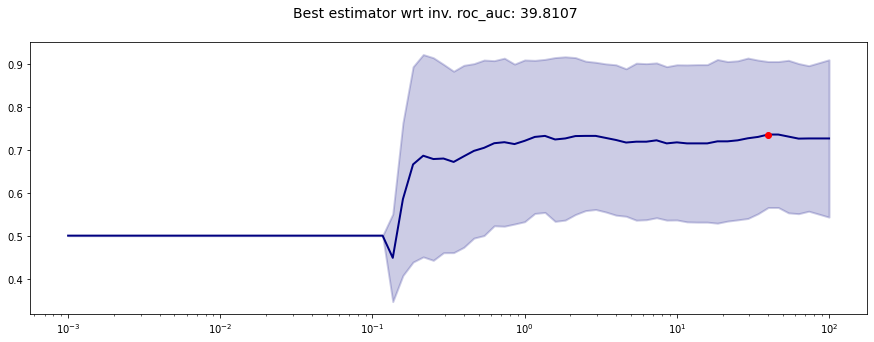


Reduced 46 factors to 43 which is 93.478%
Positive: 20 which is 46.512%
Negative: 23 which is 53.488%
--------------------------------- 
 Positive:
['do_out_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2', 'up_out_farm_labour_force', 'do_out_life_expectancy', 'up_out_pop_density', 'do_out_employment_thousand_hours_worked_nuts2', 'do_out_unemployment_rate_nuts2', 'do_out_deaths', 'do_out_farm_labour_force', 'up_out_utilised_agricultural_area', 'up_out_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2', 'up_out_hospital_discharges_resp_diseases_j00_to_j99_nuts2', 'do_out_available_hospital_beds_nuts2', 'up_out_compensation_of_employees_by_nuts2', 'do_out_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2', 'do_out_utilised_agricultural_area', 'do_out_health_personnel_by_nuts2', 'up_out_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts

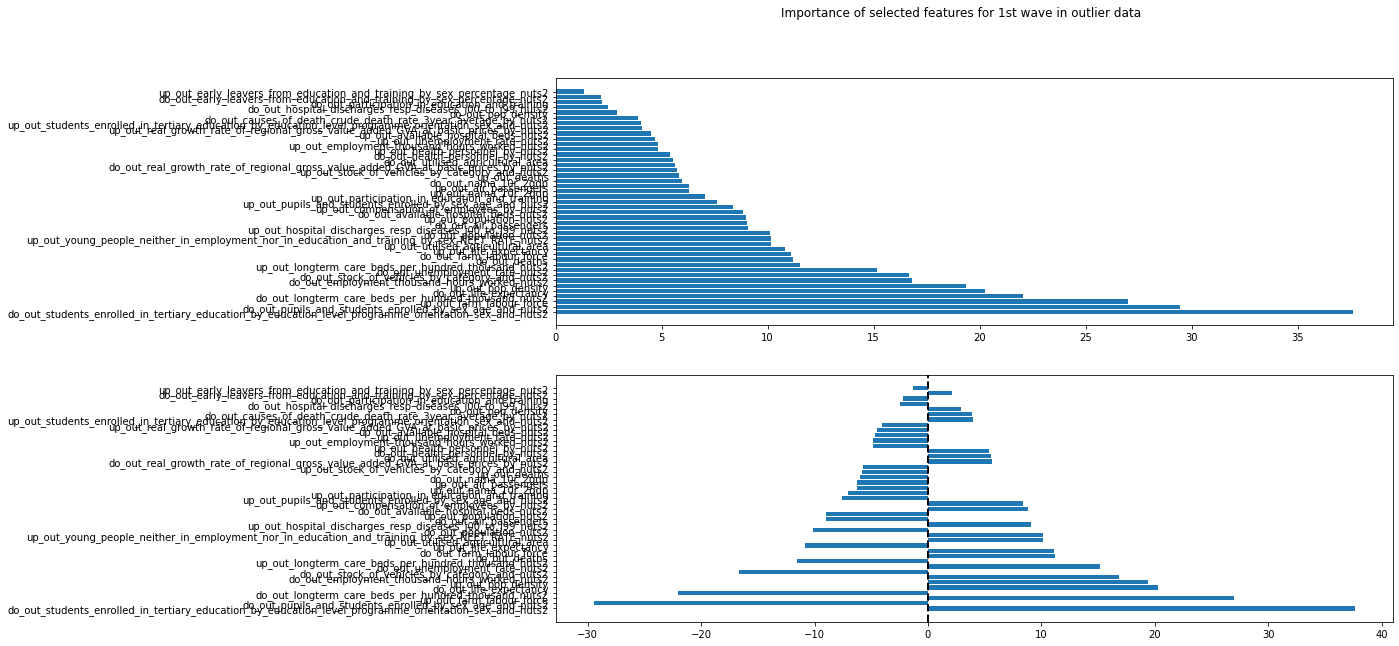

In [ ]:
o_cols1 = LASSO_LR(dfd['wave1_high'], dfd.iloc[:,dfd.columns.get_loc('up_out_air_passengers'):], '1st wave in outlier data')

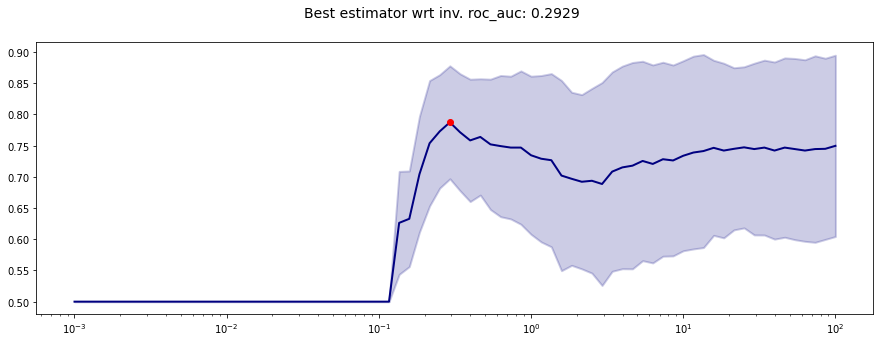


Reduced 46 factors to 6 which is 13.043%
Positive: 3 which is 50.0%
Negative: 3 which is 50.0%
--------------------------------- 
 Positive:
['up_out_early_leavers_from_education_and_training_by_sex_percentage_nuts2', 'do_out_life_expectancy', 'do_out_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2']
--------------------------------- 
 Negative:
['do_out_utilised_agricultural_area', 'up_out_participation_in_education_and_training', 'do_out_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2']


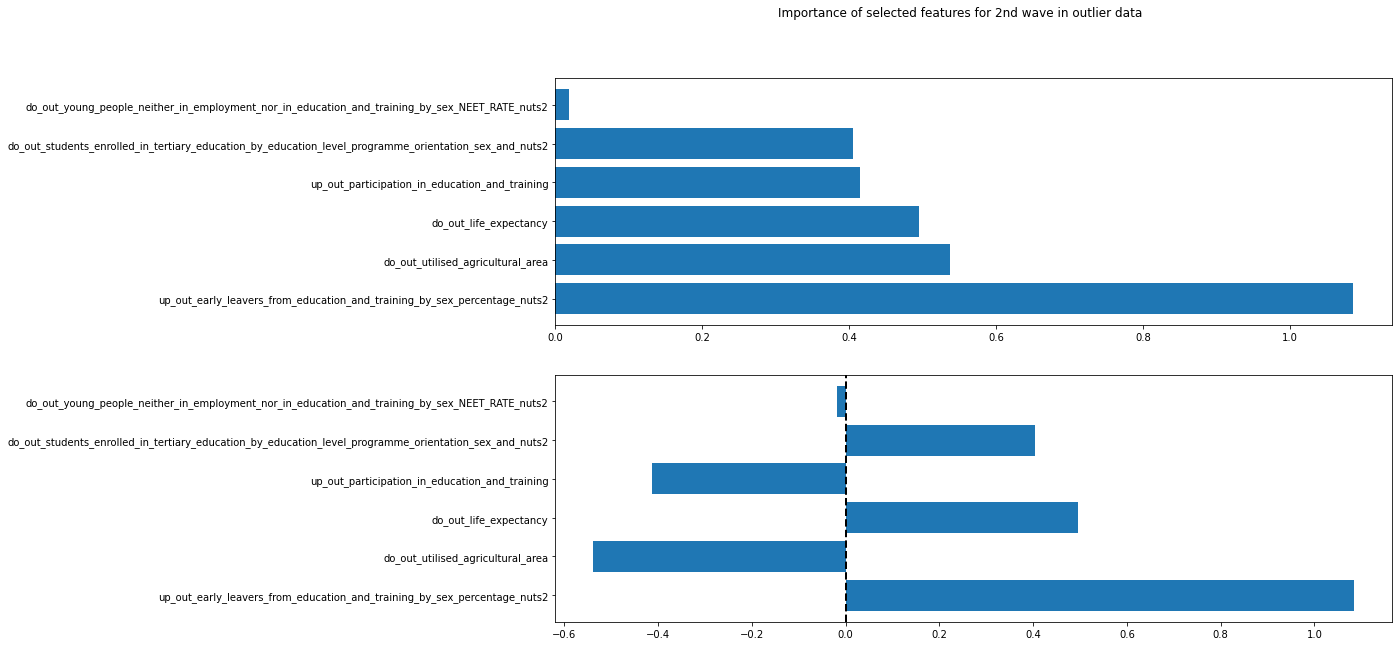

In [ ]:
o_cols2 = LASSO_LR(dfd['wave2_high'], dfd.iloc[:,dfd.columns.get_loc('up_out_air_passengers'):], '2nd wave in outlier data')

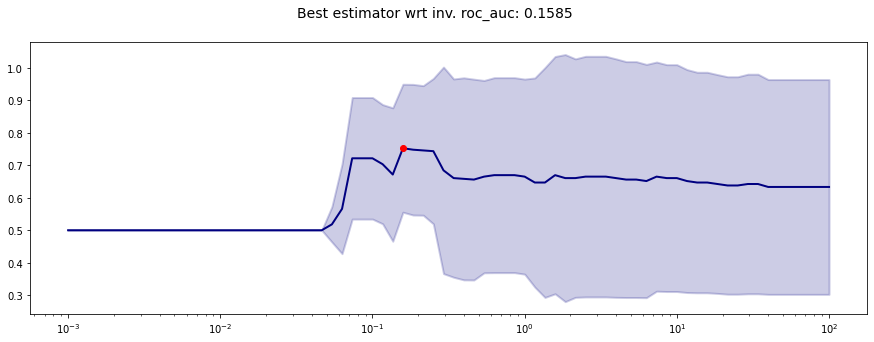


Reduced 46 factors to 3 which is 6.522%
Positive: 0 which is 0.0%
Negative: 3 which is 100.0%
--------------------------------- 
 Positive:
[]
--------------------------------- 
 Negative:
['under_life_expectancy', 'under_participation_in_education_and_training', 'under_unemployment_rate_nuts2']


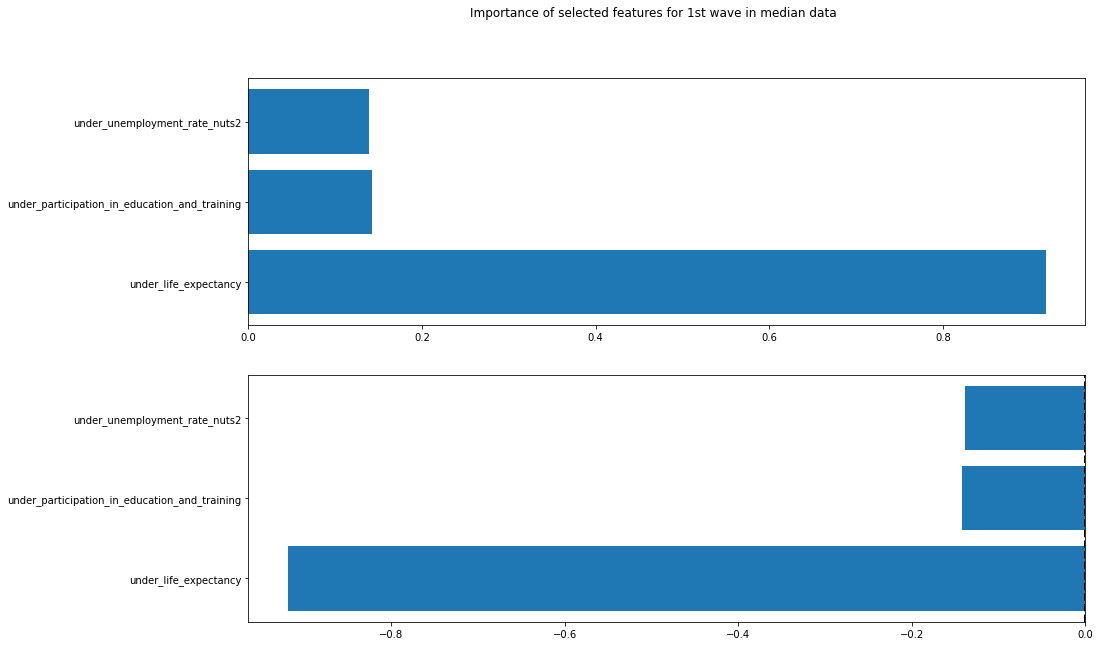

In [ ]:
m_cols1 = LASSO_LR(df['wave1_high'], df.iloc[:,df.columns.get_loc('over_air_passengers'):], '1st wave in median data')

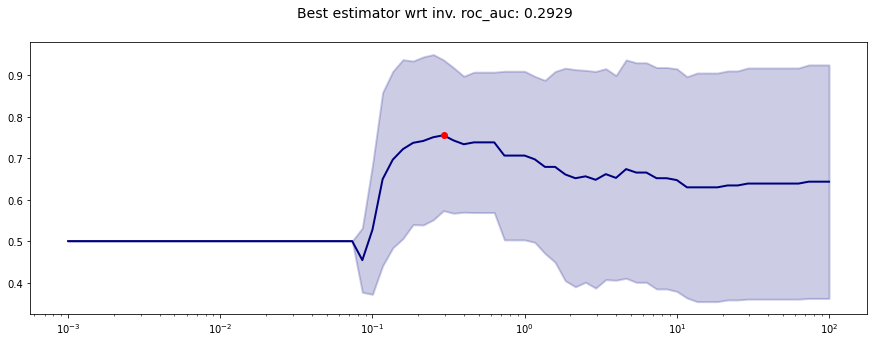


Reduced 46 factors to 5 which is 10.87%
Positive: 0 which is 0.0%
Negative: 5 which is 100.0%
--------------------------------- 
 Positive:
[]
--------------------------------- 
 Negative:
['under_unemployment_rate_nuts2', 'over_causes_of_death_crude_death_rate_3year_average_by_nuts2', 'under_life_expectancy', 'under_participation_in_education_and_training', 'under_early_leavers_from_education_and_training_by_sex_percentage_nuts2']


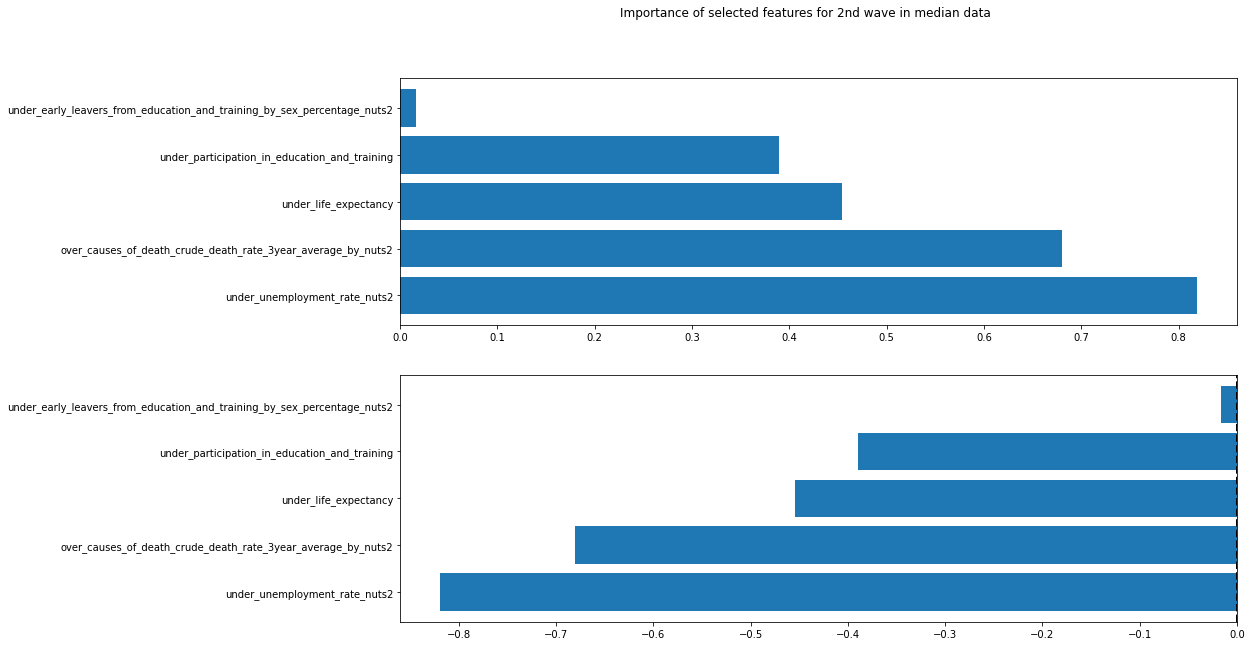

In [ ]:
m_cols2 = LASSO_LR(df['wave2_high'], df.iloc[:,df.columns.get_loc('over_air_passengers'):], '2nd wave in median data')

# Unique methodology

## Data and packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
kaggle = '/content/drive/MyDrive/Tesi/ASPdataset.csv'

kaggle = pd.read_csv(kaggle)

#kaggle.columns = ['NUTS', 'Air passengers', 'Hospital beds', 'Death rate', 'Compensation of employees', 'Total deaths', 'Early leavers from ed.', 'Worked hours', 'Farm labour force', 'Health personnel', 'Resp. diseases discharges', 'Life expectancy', 'Long-term beds', 'GDP', 'Participation in ed.', 'Population density', 'Total population', 'Pupils enrolled', 'Regional GVA growth', 'Stock of vehicles', 'Tertiary ed. students', 'Unemployment rate', 'Utilised agricultural area', 'NEETs', 'binary_first_wave', 'binary_second_wave', 'multi_first_wave', 'multi_second_wave', 'cases_density_first_wave', 'cases_density_second_wave']

kaggle.head()

,NUTS,air_passengers,available_hospital_beds_nuts2,causes_of_death_crude_death_rate_3year_average_by_nuts2,compensation_of_employees_by_nuts2,deaths,early_leavers_from_education_and_training_by_sex_percentage_nuts2,employment_thousand_hours_worked_nuts2,farm_labour_force,health_personnel_by_nuts2,...,students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,unemployment_rate_nuts2,utilised_agricultural_area,young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2,binary_first_wave,binary_second_wave,multi_first_wave,multi_second_wave,cases_density_first_wave,cases_density_second_wave
0,AT11,NaN,587.21,1120.95,4305.0,3393.0,NaN,203160.0,6170.0,1277.0,...,6750.0,4.2,181970.0,NaN,below_than_avg,higher_than_avg,low,medium,0.001539,0.038942
1,AT12,31635.0,671.36,1036.91,28451.0,17449.0,7.7,1179290.0,30660.0,7919.0,...,33152.0,4.2,908850.0,7.0,below_than_avg,higher_than_avg,low,medium,0.002208,0.039038
2,AT13,NaN,751.91,857.68,48625.0,16150.0,10.6,1662610.0,2110.0,13078.0,...,192471.0,10.6,8020.0,9.9,below_than_avg,higher_than_avg,medium,medium,0.003531,0.042492
3,AT21,210.0,803.93,1081.98,10099.0,6031.0,NaN,438030.0,7530.0,2722.0,...,15527.0,4.7,220340.0,7.9,below_than_avg,higher_than_avg,low,medium,0.001083,0.049172
4,AT22,1035.0,801.30,1003.76,24503.0,12691.0,5.7,1023160.0,21440.0,6489.0,...,62035.0,4.4,375180.0,7.6,below_than_avg,higher_than_avg,low,medium,0.001845,0.041521


In [ ]:
# Paths
kaggle = '/content/drive/MyDrive/Tesi/ASPdataset.csv'

# Load data
%time 

kaggle.columns = ['Reg. code', 'Air passengers', 'Hospital beds', 'Death rate', 'Compensation of employees', 'Total deaths', 'Early leavers from ed.', 'Worked hours', 'Farm labour force', 'Health personnel', 'Resp. diseases discharges', 'Life expectancy', 'Long-term beds', 'GDP', 'Participation in ed.', 'Population density', 'Total population', 'Pupils enrolled', 'Regional GVA growth', 'Stock of vehicles', 'Tertiary ed. students', 'Unemployment rate', 'Utilised agricultural area', 'NEETs', '1st wave cases density', '2nd wave cases density', 'Country', 'Latitude', 'Longitude']

kaggle.describe().T

CPU times: user 7.56 ms, sys: 0 ns, total: 7.56 ms
Wall time: 12.2 ms


,count,mean,std,min,25%,50%,75%,max
Air passengers,109.0,1.161484e+04,1.848243e+04,3.000000,667.000000,3.536000e+03,1.262800e+04,1.079910e+05
Hospital beds,108.0,5.519535e+02,4.104496e+02,190.350000,309.322500,3.867900e+02,6.720475e+02,2.688020e+03
Death rate,129.0,1.063181e+03,2.356622e+02,591.630000,913.800000,1.041050e+03,1.179441e+03,1.998320e+03
Compensation of employees,129.0,3.970405e+04,6.286449e+04,719.570000,8806.200000,1.837606e+04,4.322820e+04,3.998407e+05
Total deaths,136.0,2.706165e+04,2.816538e+04,266.000000,9631.250000,1.744550e+04,3.500400e+04,2.064790e+05
Early leavers from ed.,136.0,9.852265e+00,6.216065e+00,0.027463,6.475000,9.000000e+00,1.270000e+01,2.700000e+01
Worked hours,136.0,1.779786e+06,1.759115e+06,28751.890000,664842.325000,1.168482e+06,2.135463e+06,9.742156e+06
Farm labour force,136.0,4.555603e+04,5.437306e+04,0.000000,9552.500000,2.486000e+04,5.607750e+04,2.793800e+05
Health personnel,130.0,1.060870e+04,1.158151e+04,317.190822,3518.750000,6.703500e+03,1.383350e+04,7.439749e+04
Resp. diseases discharges,121.0,2.884655e+04,2.725361e+04,22.662104,6845.000000,2.009100e+04,4.448700e+04,1.230670e+05


In [ ]:
def transform(target, method, feature):
  df = pd.DataFrame(kaggle['NUTS'])
  if target == 'density':
    kaggle.dropna(subset=['cases_density_first_wave'], inplace=True)
    if method == 'median':
      df['wave1_high'] = kaggle['cases_density_first_wave'].apply(lambda row: row >= kaggle['cases_density_first_wave'].median()).astype("int64")
      df['wave1_low'] = kaggle['cases_density_first_wave'].apply(lambda row: row < kaggle['cases_density_first_wave'].median()).astype("int64")
      df['wave2_high'] = kaggle['cases_density_second_wave'].apply(lambda row: row >= kaggle['cases_density_second_wave'].median()).astype("int64")
      df['wave2_low'] = kaggle['cases_density_second_wave'].apply(lambda row: row < kaggle['cases_density_second_wave'].median()).astype("int64")
    elif method == 'quantile':
      df['High 1st'] = kaggle['cases_density_first_wave'].apply(lambda row: row >= kaggle['cases_density_first_wave'].quantile(0.9)).astype("int64")
      df['Low 1st'] = kaggle['cases_density_first_wave'].apply(lambda row: row < kaggle['cases_density_first_wave'].quantile(0.9)).astype("int64")
      df['High 2nd'] = kaggle['cases_density_second_wave'].apply(lambda row: row >= kaggle['cases_density_second_wave'].quantile(0.9)).astype("int64")
      df['Low 2nd'] = kaggle['cases_density_second_wave'].apply(lambda row: row < kaggle['cases_density_second_wave'].quantile(0.9)).astype("int64")
  if target == 'original':
    df['wave1_high'] = kaggle['binary_first_wave'].apply(lambda row: row == "higher_than_avg").astype("int64")
    df['wave1_low'] = kaggle['binary_first_wave'].apply(lambda row: row == "below_than_avg").astype("int64")
    df['wave2_high'] = kaggle['binary_second_wave'].apply(lambda row: row == "higher_than_avg").astype("int64")
    df['wave2_low'] = kaggle['binary_second_wave'].apply(lambda row: row == "below_than_avg").astype("int64")
  if feature == 'outlier':
    df1 = pd.DataFrame(kaggle['NUTS'])
    df1[kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column < column.quantile(0.25))
    df2 = pd.DataFrame(kaggle['NUTS'])
    df2[kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column > column.quantile(0.75))
    df["outIRQ_" + kaggle.columns[1:len(kaggle.columns)-6]] = df1[kaggle.columns[1:len(kaggle.columns)-6]] | df2[kaggle.columns[1:len(kaggle.columns)-6]]
    df["outIRQ_" + kaggle.columns[1:len(kaggle.columns)-6]] = df["outIRQ_" + kaggle.columns[1:len(kaggle.columns)-6]].astype("int64")
  elif feature == 'nomiddle':
    df1 = pd.DataFrame(kaggle['NUTS'])
    df1[kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column < column.quantile(0.25))
    df2 = pd.DataFrame(kaggle['NUTS'])
    df2[kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column > column.quantile(0.75))
    df["(Over q75) " + kaggle.columns[1:len(kaggle.columns)-6]] = df1[kaggle.columns[1:len(kaggle.columns)-6]]
    df["(Over q75) " + kaggle.columns[1:len(kaggle.columns)-6]] = df["(Over q75) " + kaggle.columns[1:len(kaggle.columns)-6]].astype("int64")
    df["(Under q25) " + kaggle.columns[1:len(kaggle.columns)-6]] = df2[kaggle.columns[1:len(kaggle.columns)-6]]
    df["(Under q25) " + kaggle.columns[1:len(kaggle.columns)-6]] = df["(Under q25) " + kaggle.columns[1:len(kaggle.columns)-6]].astype("int64")
  elif feature == 'median':
    df["over_" + kaggle.columns[1:len(kaggle.columns)-6]] = kaggle.iloc[:, 1:len(kaggle.columns)-6].apply(lambda column: column >= column.median()).astype("int64")
  return df

In [ ]:
df = transform('density', 'median', 'median')
# Might need to run 2 times for med med idk why

df1 = df.drop(['wave2_high', 'wave2_low'], axis=1)
df2 = df.drop(['wave1_high', 'wave1_low'], axis=1)

df.head()

,NUTS,wave1_high,wave1_low,wave2_high,wave2_low,over_air_passengers,over_available_hospital_beds_nuts2,over_causes_of_death_crude_death_rate_3year_average_by_nuts2,over_compensation_of_employees_by_nuts2,over_deaths,...,over_participation_in_education_and_training,over_pop_density,over_population_nuts2,over_pupils_and_students_enrolled_by_sex_age_and_nuts2,over_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,over_stock_of_vehicles_by_category_and_nuts2,over_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,over_unemployment_rate_nuts2,over_utilised_agricultural_area,over_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2
0,AT11,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AT12,0,1,1,0,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,AT13,1,0,1,0,0,1,0,1,0,...,1,1,1,0,0,0,1,1,0,0
3,AT21,0,1,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,AT22,0,1,1,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0


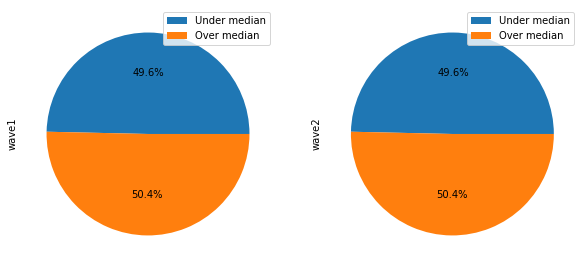

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,10))
df1.groupby(['High 1st']).size().reset_index(name='wave1').plot.pie(y='wave1', labels=None,autopct='%1.1f%%', ax=axes[0])
axes[0].legend(labels=['Under median', 'Over median'])
df2.groupby(['High 2nd']).size().reset_index(name='wave2').plot.pie(y='wave2', labels=None,autopct='%1.1f%%', ax=axes[1])
axes[1].legend(labels=['Under median', 'Over median'])

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,10))
df1.groupby(['High 1st']).size().reset_index(name='wave1').plot.pie(y='wave1', labels=None,autopct='%1.1f%%', ax=axes[0])
axes[0].legend(labels=['Under quantile 90', 'Over quantile 90'])
df2.groupby(['High 2nd']).size().reset_index(name='wave2').plot.pie(y='wave2', labels=None,autopct='%1.1f%%', ax=axes[1])
axes[1].legend(labels=['Under median', 'Over median'])

## LASSO

Consider obtaining p-values of the coefficients still using python

### Functions

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.svm import l1_min_c
from google.colab import files

In [ ]:
def LASSO_LR(grading, data, name):
  # Select Target and Input variables from the dataframe
  X = data
  y = grading
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, random_state=1234, shuffle=True)

  # Create crossvalidation splits
  crossvalidation = StratifiedKFold(n_splits=10, shuffle=True, random_state=4815)

  # Set grid search values
  parameters = {'C': np.logspace(np.log10(1e-3), np.log10(1e2), 76)}

  # Instantiate and fit Grid Search
  lasso = linear_model.LogisticRegression(random_state=4815, solver="liblinear", penalty='l1', verbose=0)
  performance = 'roc_auc'  #'accuracy', 'balanced_accuracy'
  lasso_gs = GridSearchCV(lasso, parameters, n_jobs=-1, cv=crossvalidation, scoring=performance)
  lasso_gs.fit(X_train, y_train)
  
  # Plot results
  df = pd.DataFrame(lasso_gs.cv_results_)
  fig = plt.figure(figsize=(15, 5))
  ax = fig.add_subplot(111)
  ax.plot(parameters['C'], df['mean_test_score'], label="Cross-validation score", color="navy", lw=2)
  ax.fill_between(parameters['C'], df['mean_test_score'] - df['std_test_score'],
                   df['mean_test_score'] + df['std_test_score'], alpha=0.2, color="navy", lw=2)
  ax.plot(lasso_gs.best_estimator_.C, lasso_gs.best_score_, 'ro')
  #extra = lasso_gs.best_estimator_.C + 100*(parameters['C'][24] - parameters['C'][0])
  #ax.axvline(extra, color="blue", linestyle='--', lw=2)
  ax.set_xscale('log')
  fig.suptitle('Performance of LASSO penalization parameters', fontsize=14)  # +', real used: '+str(round(extra, 4))
  plt.show()
  print('LASSO parameter value: '+str(round(lasso_gs.best_estimator_.C, 4)))
  print('ROC AUC value: '+str(round(lasso_gs.best_score_, 4)))

  # Fit the model on the full dataset using the best estimator parameter + 5 steps
  lasso = linear_model.LogisticRegression(C=lasso_gs.best_estimator_.C, penalty='l1', random_state=5, solver='liblinear', verbose=0)
  xval_score = cross_val_score(lasso,X_train,y_train,cv=crossvalidation)

  # Fit the model on the full trainig set using the best estimator
  lasso.fit(X_train, y_train)
  yp = lasso.predict(X_test)
  # Select the features with the largest feature importance (both negative and positive)
  importances = lasso.coef_[0]
  indices = np.argsort(np.absolute(importances))[::-1]  #[0:100]
  filtered_indices = indices[np.absolute(importances[indices]) > 0.000001]
  pos_filtered_indices = indices[importances[indices] > 0.000001]
  neg_filtered_indices = indices[importances[indices] < -0.000001]
  selected_features = X.columns[filtered_indices]
  
  print('Reduced ' + str(len(indices)) + ' factors to ' + str(len(filtered_indices)) + ' which is ' + str(round(100*len(filtered_indices)/len(indices),3)) + '%')
  print('Positive: ' + str(len(pos_filtered_indices)) + ' which is ' + str(round(100*len(pos_filtered_indices)/len(filtered_indices),3)) + '%')
  print('Negative: ' + str(len(neg_filtered_indices)) + ' which is ' + str(round(100*len(neg_filtered_indices)/len(filtered_indices),3)) + '%')
  print('--------------------------------- \n Positive:')
  print(X.columns[pos_filtered_indices].tolist())
  print('--------------------------------- \n Negative:')
  print(X.columns[neg_filtered_indices].tolist())
  
  #fig, axs = plt.subplots(2, figsize=(15, 10))
  plt.suptitle('Importance of selected features for '+name)
  #axs[0].barh(selected_features, np.absolute(importances[filtered_indices]))
  
  plt.barh(selected_features, importances[filtered_indices])
  plt.axvline(0, color="black", linestyle='--', lw=2)
  '''
  fig = plt.figure(figsize=(3, 1))  # Width, height
  ax = fig.add_subplot(111)
  ax.barh(selected_features, importances[filtered_indices])
  ax.axvline(0, color="black", linestyle='--', lw=2)
  '''
  plt.show()

  df = [selected_features.tolist(), X.columns[pos_filtered_indices].tolist(), X.columns[neg_filtered_indices].tolist()]
  
  return df

### ASP

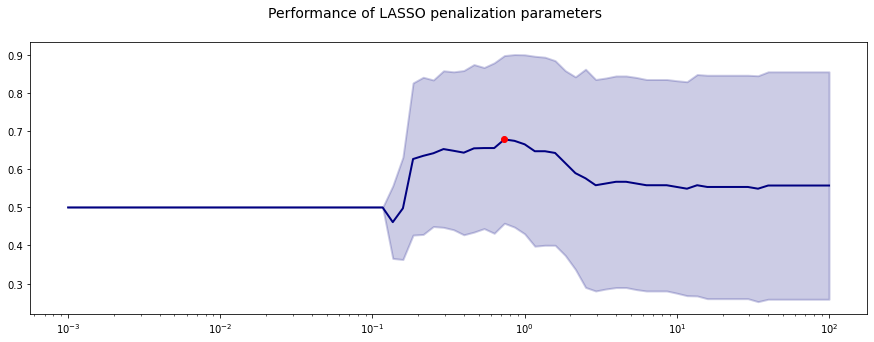

LASSO parameter value: 0.7356
ROC AUC value: 0.6788
Reduced 23 factors to 7 which is 30.435%
Positive: 3 which is 42.857%
Negative: 4 which is 57.143%
--------------------------------- 
 Positive:
['(Out) Life expectancy', '(Out) Population density', '(Out) Health personnel']
--------------------------------- 
 Negative:
['(Out) Participation in ed.', '(Out) Hospital beds', '(Out) NEETs', '(Out) Utilised agricultural area']


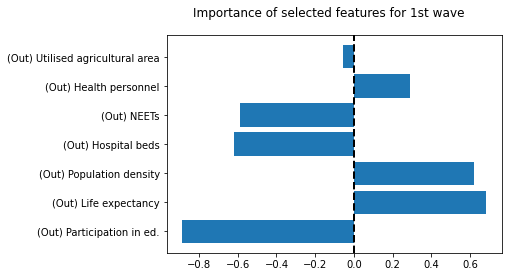

In [ ]:
# LASSO

features1 = LASSO_LR(df1['High 1st'], df1.iloc[:,df1.columns.get_loc('(Out) Air passengers'):], '1st wave')
features2 = LASSO_LR(df2['High 2nd'], df2.iloc[:,df2.columns.get_loc('(Out) Air passengers'):], '2nd wave')

#pd.DataFrame(features1).to_csv('t1med_nobet_lasso.csv')
#files.download('t1med_nobet_lasso.csv')
#pd.DataFrame(features2).to_csv('t2med_nobet_lasso.csv')
#files.download('t2med_nobet_lasso.csv')

In [ ]:
# Do not add negatives

df1 = df1[['NUTS', 'wave1_high', 'wave1_low'] + features1[0]]
df2 = df2[['NUTS', 'wave2_high', 'wave2_low'] + features2[0]]

In [ ]:
# Add negatives

df1 = df1[['NUTS', 'wave1_high', 'wave1_low'] + features1[0]]
df1["not_" + df1.columns[2:len(df1.columns)]] = 1 - df1[df1.columns[2:len(df1.columns)]]
df2 = df2[['NUTS', 'wave2_high', 'wave2_low'] + features2[0]]
df2["not_" + df2.columns[2:len(df2.columns)]] = 1 - df2[df2.columns[2:len(df2.columns)]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## LASSO filtered features

Save the results from the previous step in order to not repeat it everytime, then upload them here

In [ ]:
# ASP correction

features1 = '/content/drive/MyDrive/Tesi/Unique methodology/t1med_med_lasso.csv'
features2 = '/content/drive/MyDrive/Tesi/Unique methodology/t2med_med_lasso.csv'
features1 = pd.read_csv(features1)
features2 = pd.read_csv(features2)

df1 = df1[['NUTS', 'wave1_high', 'wave1_low'] + features1.iloc[0].to_list()[1:]]
df2 = df2[['NUTS', 'wave2_high', 'wave2_low'] + features2.iloc[0].to_list()[1:]]

# Add negatives or comment
df1["not_" + df1.columns[3:len(df1.columns)]] = 1 - df1[df1.columns[3:len(df1.columns)]]
df2["not_" + df2.columns[3:len(df2.columns)]] = 1 - df2[df2.columns[3:len(df2.columns)]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df2.head()

,NUTS,wave2_high,wave2_low,over_health_personnel_by_nuts2,over_stock_of_vehicles_by_category_and_nuts2,over_employment_thousand_hours_worked_nuts2,over_hospital_discharges_resp_diseases_j00_to_j99_nuts2,over_utilised_agricultural_area,over_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,over_life_expectancy,...,not_over_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2,not_over_population_nuts2,not_over_unemployment_rate_nuts2,not_over_young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2,not_over_available_hospital_beds_nuts2,not_over_early_leavers_from_education_and_training_by_sex_percentage_nuts2,not_over_compensation_of_employees_by_nuts2,not_over_air_passengers,not_over_participation_in_education_and_training,not_over_farm_labour_force
0,AT11,1,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
1,AT12,1,0,1,1,1,0,1,0,0,...,1,0,1,1,0,1,0,0,1,0
2,AT13,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,AT21,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,1,1,0,1
4,AT22,1,0,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,1,0,1


## Rule mining

### Functions

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages('arules', verbose=F, quiet=T)
library(arules)

In [ ]:
%%R

genes_to_transactions <- function(data){
  # Data formatting and collecting
  names_data <- names(data[-c(1)])
  matrix_data <- matrix(unlist(data[-c(1)]), ncol=dim(data[-c(1)])[2], nrow=dim(data[-c(1)])[1])
  colnames(matrix_data) <- names_data
  # Use the constructor to create transactions
  trans <- transactions(matrix_data)
  return(trans)
}

In [ ]:
%%R

grid_search <- function(dat, lab){
  supports <- c(0.02, 0.05, 0.1, 0.2)  # 0.007, 0.01 give too many rules in general
  confidences <- c(0.6, 0.7, 0.8, 0.9)  # 0.5 gives too many rules in general
  stats <- data.frame(support=double(), confidence=double(), pvalue=double(), rules=integer(), stringsAsFactors=F)
  for(i in 1:length(supports)){
      for(j in 1:length(confidences)){
          #extract rules
          mined_rules <- apriori(data = dat,
                           parameter = list(supp=supports[i], conf=confidences[j], minlen=3),
                           appearance = list(rhs=grep(lab, itemLabels(dat), value=TRUE)),  # no lhs or crashes
                           control = list(verbose=F))
          #compute p-value
          quality(mined_rules) <- cbind(quality(mined_rules),
                                  pval = interestMeasure(mined_rules, measure="fishersExactTest", transactions=dat, reuse=TRUE))  # adjust='none'
          #extract median lift and pvalue and store number of extracted rules
          pval <- median(quality(mined_rules)$pval)  # no \ for \$pval
          lifting <- median(quality(mined_rules)$lift)  # added because there wasn't
          counter <- length(mined_rules)
          #add elements to dataframe
          stats <- rbind(stats, data.frame(support=supports[i], confidence=confidences[j], pvalue=pval, lift=lifting, count=counter))
  }}
  return(stats)
}

In [ ]:
%%R

ar_mine <- function(train, sup, con, lab){
  # Mine all rules using apriori
  rules <- apriori(data = train,
                  parameter = list(supp=sup, conf=con, minlen=3),
                  appearance = list(rhs=grep(lab, itemLabels(train), value=TRUE)),  # no lhs = items ,
                  control = list(verbose=F))
  # Keep statistically significant rules on the train set, without correction
  sig_rules <- rules[is.significant(rules, train, method='fisher', alpha=0.05, adjust='none')]
  # Calculate p-value on the Test Set
  quality(sig_rules) <- cbind(quality(sig_rules),
                            pvalue_test = interestMeasure(sig_rules, measure="fishersExactTest", transactions=train, reuse=FALSE))  # adjust='none',
  # Select statistically significant rules, using Bonferroni correction
  final_rules <- subset(sig_rules, pvalue_test < 0.05/length(sig_rules))  # Bonferroni = alpha/n_tests
  print('Mining successful')
  return(final_rules)
}

### Process

In [ ]:
%R -i df1
%R -i df2

In [ ]:
%%R

items_1 <- genes_to_transactions(df1)
items_2 <- genes_to_transactions(df2)

In [ ]:
# Severity rules

%%time

#%R grid_search(items_1, "wave1_high")
#%R grid_search(items_2, "wave2_high")

In [ ]:
%%R

# Severity rules

#severity <- ar_mine(items_1, 0.2, 0.7, "wave1_high")
severity <- ar_mine(items_2, 0.1, 0.9, "wave2_high")

summary(severity)

[1] "Mining successful"
set of 7 rules

rule length distribution (lhs + rhs):sizes
4 5 6 
4 2 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   4.000   4.571   5.000   6.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.1064   Min.   :0.9000   Min.   :0.1135   Min.   :1.787  
 1st Qu.:0.1064   1st Qu.:0.9211   1st Qu.:0.1135   1st Qu.:1.829  
 Median :0.1064   Median :0.9375   Median :0.1135   Median :1.862  
 Mean   :0.1145   Mean   :0.9280   Mean   :0.1236   Mean   :1.843  
 3rd Qu.:0.1206   3rd Qu.:0.9375   3rd Qu.:0.1312   3rd Qu.:1.862  
 Max.   :0.1348   Max.   :0.9412   Max.   :0.1489   Max.   :1.869  
     count        pvalue_test       
 Min.   :15.00   Min.   :4.063e-05  
 1st Qu.:15.00   1st Qu.:7.528e-05  
 Median :15.00   Median :1.395e-04  
 Mean   :16.14   Mean   :1.070e-04  
 3rd Qu.:17.00   3rd Qu.:1.395e-04  
 Max.   :19.00   Max.   :1.395e-04  

mining info:
  data ntransactions supp

In [ ]:
# Mildness rules

%%time

#%R grid_search(items_1, "wave1_low")
#%R grid_search(items_2, "wave2_low")

In [ ]:
%%R

# Mildness rules

#mildness <- ar_mine(items_1, 0.2, 0.9, "wave1_low")
mildness <- ar_mine(items_2, 0.2, 0.8, "wave2_low")

summary(mildness)

[1] "Mining successful"
set of 1 rules

rule length distribution (lhs + rhs):sizes
4 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4       4       4       4       4       4 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.2057   Min.   :0.8056   Min.   :0.2553   Min.   :1.623  
 1st Qu.:0.2057   1st Qu.:0.8056   1st Qu.:0.2553   1st Qu.:1.623  
 Median :0.2057   Median :0.8056   Median :0.2553   Median :1.623  
 Mean   :0.2057   Mean   :0.8056   Mean   :0.2553   Mean   :1.623  
 3rd Qu.:0.2057   3rd Qu.:0.8056   3rd Qu.:0.2553   3rd Qu.:1.623  
 Max.   :0.2057   Max.   :0.8056   Max.   :0.2553   Max.   :1.623  
     count     pvalue_test       
 Min.   :29   Min.   :1.331e-05  
 1st Qu.:29   1st Qu.:1.331e-05  
 Median :29   Median :1.331e-05  
 Mean   :29   Mean   :1.331e-05  
 3rd Qu.:29   3rd Qu.:1.331e-05  
 Max.   :29   Max.   :1.331e-05  

mining info:
  data ntransactions support confidence
 train        

In [ ]:
%%R

#inspect(severity)
inspect(mildness)

    lhs                                                                                                           rhs           support confidence  coverage     lift count  pvalue_test
[1] {not_over_students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2,                                                                           
     not_over_life_expectancy,                                                                                                                                                          
     not_over_real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2}                     => {wave2_low} 0.2056738  0.8055556 0.2553191 1.622619    29 1.331036e-05


## Rule plots

This was made by creating by hand a csv file with the information needed from the rules. Highlighting the features that had a weight contrary to the type of rule were highlighted afterwards.

In [ ]:
# Plot Antonio's plots

import matplotlib
cmap = matplotlib.cm.get_cmap('Reds')

<Figure size 432x288 with 0 Axes>

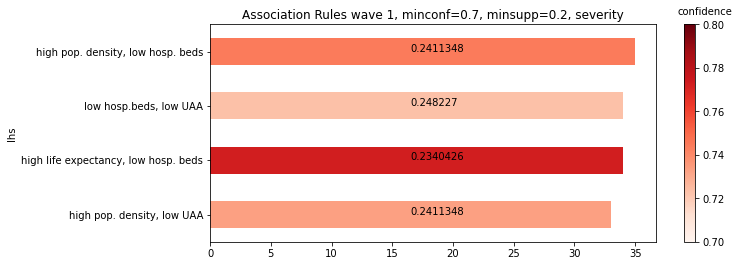

In [ ]:
severity = '/content/drive/MyDrive/Tesi/Unique methodology/21_descr1_sev.csv'
severity = pd.read_csv(severity)

severity = severity.sort_values(by='supp',ascending=True)

norm = matplotlib.colors.Normalize(vmin=0.7, vmax=0.8)
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
rgba = cmap(norm(severity['conf']))

plt.figure();
severity.plot.barh(x='lhs', y='count', rot=0, legend=False, figsize=(10,4), 
              title='Association Rules wave 1, minconf=0.7, minsupp=0.2, severity', color=rgba, ylabel='supp')
for i in range(len(severity['supp'])):
  plt.text(min(severity['count'])/2,i,severity['supp'][i])
cbar = plt.colorbar(sm)
cbar.set_label('confidence', labelpad=-20, y=1.08, rotation=0)
plt.show()

<Figure size 432x288 with 0 Axes>

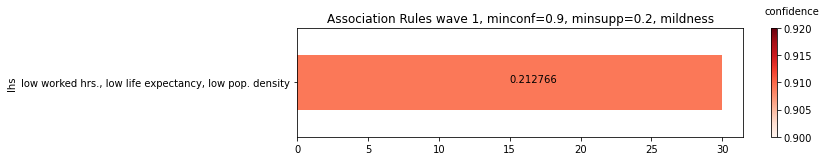

In [ ]:
mildness = '/content/drive/MyDrive/Tesi/Unique methodology/21_descr1_mild.csv'
mildness = pd.read_csv(mildness)

mildness = mildness.sort_values(by='supp',ascending=True)

norm = matplotlib.colors.Normalize(vmin=0.9, vmax=0.92)
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
rgba = cmap(norm(mildness['conf']))

plt.figure();
mildness.plot(kind='barh', x='lhs', y='count', rot=0, legend=False, figsize=(10,2),
              title='Association Rules wave 1, minconf=0.9, minsupp=0.2, mildness', color=rgba, ylabel='supp')
for i in range(len(mildness['supp'])):
  plt.text(min(mildness['count'])/2,i,mildness['supp'][i])
cbar = plt.colorbar(sm)
cbar.set_label('confidence', labelpad=-20, y=1.2, rotation=0)
plt.show()

<Figure size 432x288 with 0 Axes>

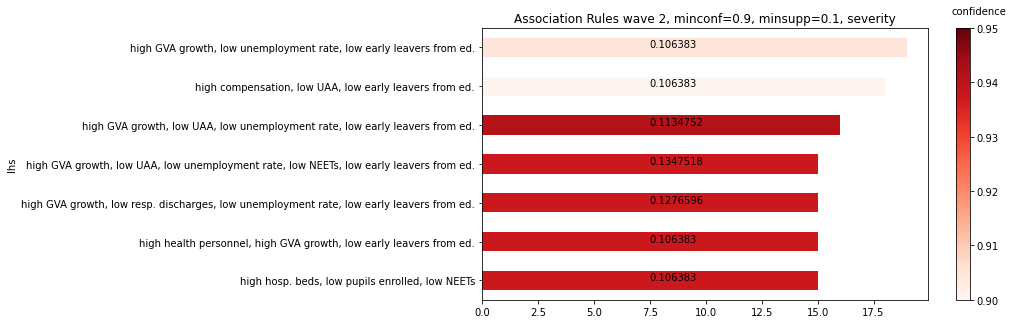

In [ ]:
severity = '/content/drive/MyDrive/Tesi/Unique methodology/21_descr2_sev.csv'
severity = pd.read_csv(severity)

severity = severity.sort_values(by='supp',ascending=True)

norm = matplotlib.colors.Normalize(vmin=0.9, vmax=0.95)
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
rgba = cmap(norm(severity['conf']))

plt.figure();
severity.plot.barh(x='lhs', y='count', rot=0, legend=False, figsize=(10,5), 
              title='Association Rules wave 2, minconf=0.9, minsupp=0.1, severity', color=rgba, ylabel='supp')
for i in range(len(severity['supp'])):
  plt.text(min(severity['count'])/2,i,severity['supp'][i])
cbar = plt.colorbar(sm)
cbar.set_label('confidence', labelpad=-20, y=1.08, rotation=0)
plt.show()

<Figure size 432x288 with 0 Axes>

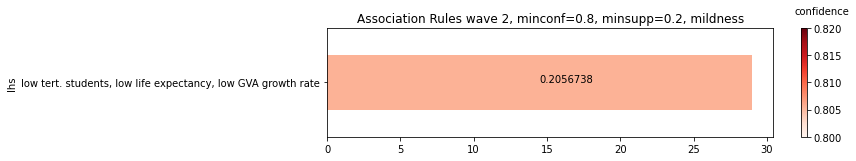

In [ ]:
mildness = '/content/drive/MyDrive/Tesi/Unique methodology/21_descr2_mild.csv'
mildness = pd.read_csv(mildness)

mildness = mildness.sort_values(by='supp',ascending=True)

norm = matplotlib.colors.Normalize(vmin=0.8, vmax=0.82)
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
rgba = cmap(norm(mildness['conf']))

plt.figure();
mildness.plot(kind='barh', x='lhs', y='count', rot=0, legend=False, figsize=(10,2),
              title='Association Rules wave 2, minconf=0.8, minsupp=0.2, mildness', color=rgba, ylabel='supp')
for i in range(len(mildness['supp'])):
  plt.text(min(mildness['count'])/2,i,mildness['supp'][i])
cbar = plt.colorbar(sm)
cbar.set_label('confidence', labelpad=-20, y=1.2, rotation=0)
plt.show()

## Output evaluation

### Export

In [ ]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%R rules1 <- LIST(severity@lhs, decode = TRUE)
%R lr1 <- length(rules1)
%R -o lr1

rules_1 = []
for ind in range(lr1[0]):
  %R -i ind
  %R elem <- rules1[[ind+1]]
  %R -o elem
  rules_1.append(list(elem))

pd.DataFrame(rules_1).to_csv('severity_t1med_out.csv')
files.download('severity_t1med_out.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%R rules0 <- LIST(mildness@lhs, decode = TRUE)
%R lr0 <- length(rules0)
%R -o lr0

rules_0 = []
for ind in range(lr0[0]):
  %R -i ind
  %R elem <- rules0[[ind+1]]
  %R -o elem
  rules_0.append(list(elem))

pd.DataFrame(rules_0).to_csv('mildness_t1med_out.csv')
files.download('mildness_t1med_out.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Subject analysis

In [ ]:
def analysis(rules_x, dfd_x, name, wave):
  rules = pd.DataFrame(dfd_x[wave])
  for i in range(len(rules_x)):
    rules[str(i)] = np.prod(dfd_x[[x for x in rules_x[i] if isinstance(x, str) & bool(x in dfd_x.columns)]], axis=1)
  summary = pd.DataFrame(rules.describe())
  out1 = rules.sort_values(summary.loc['std'].sort_values(ascending=False).index.tolist(), ascending=False)[summary.loc['std'].sort_values(ascending=False).index.tolist()]
  pd.DataFrame(out1).to_csv(name)
  files.download(name)
  return 0

In [ ]:
analysis(rules_1, df1, 'severity_t1med_out_reg.csv', 'wave1_high')
analysis(rules_0, df1, 'mildness_t1med_out_reg.csv', 'wave1_low')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0

### Features analysis

In [ ]:
def lists(name):
  # By wave
  feats = '/content/drive/MyDrive/Tesi/Unique methodology/'+name+'_lasso.csv'
  # 1 Severity, 0 Mildness
  r1 = '/content/drive/MyDrive/Tesi/Unique methodology/severity_'+name+'.csv'
  r0 = '/content/drive/MyDrive/Tesi/Unique methodology/mildness_'+name+'.csv'

  feats = pd.read_csv(feats)
  r1 = pd.read_csv(r1)
  r0 = pd.read_csv(r0)

  pos = feats.iloc[1].to_list()[1:]
  neg = feats.iloc[2].to_list()[1:]

  return pos, neg, r1, r0

In [ ]:
positive, negative, rules_1, rules_0 = lists('t1med_out')

In [ ]:
rules_0

In [ ]:
# Take features from rules and compare to LASSO

confusion_matrix = {'Positive':[0, 0], 'Negative':[0, 0]}
# Rows: First severity, then mildness

# Count for severity
for i in range(len(rules_1)):
  for j in range(len(rules_1.iloc[i])-1):
    feat = rules_1.iloc[i][j+1]
    if not isinstance(feat, str):
      pass
    elif len(feat.split('not_')) > 1:
      if feat.split('not_')[1] in positive:
        confusion_matrix['Negative'][0] += 1
      elif feat.split('not_')[1] in negative:
        confusion_matrix['Positive'][0] += 1
    else:
      if feat in positive:
        confusion_matrix['Positive'][0] += 1
      elif feat in negative:
        confusion_matrix['Negative'][0] += 1

# Count for mildness
for i in range(len(rules_0)):
  for j in range(len(rules_0.iloc[i])-1):
    feat = rules_0.iloc[i][j+1]
    if not isinstance(feat, str):
      pass
    elif len(feat.split('not_')) > 1:
      if feat.split('not_')[1] in positive:
        confusion_matrix['Negative'][1] += 1
      elif feat.split('not_')[1] in negative:
        confusion_matrix['Positive'][1] += 1
    else:
      if feat in positive:
        confusion_matrix['Positive'][1] += 1
      elif feat in negative:
        confusion_matrix['Negative'][1] += 1

pd.DataFrame(confusion_matrix, index=['Severity', 'Mildness'])

,Positive,Negative
Severity,4,0
Mildness,0,2


In [ ]:
# Take features from rules and compare to LASSO

confusion_matrix = {'Positive':[0, 0], 'Negative':[0, 0]}
# Rows: First severity, then mildness

unique = []
# Count for severity
for i in range(len(rules_1)):
  for j in range(len(rules_1.iloc[i])-1):
    feat = rules_1.iloc[i][j+1]
    if not isinstance(feat, str):
      pass
    else:
      if not(feat in unique):
        unique.append(feat)
        if len(feat.split('not_')) > 1:
          if feat.split('not_')[1] in positive:
            confusion_matrix['Negative'][0] += 1
          elif feat.split('not_')[1] in negative:
            confusion_matrix['Positive'][0] += 1
        else:
          if feat in positive:
            confusion_matrix['Positive'][0] += 1
          elif feat in negative:
            confusion_matrix['Negative'][0] += 1

unique = []
# Count for mildness
for i in range(len(rules_0)):
  for j in range(len(rules_0.iloc[i])-1):
    feat = rules_0.iloc[i][j+1]
    if not isinstance(feat, str):
      pass
    else:
      if not(feat in unique):
        unique.append(feat)
        if len(feat.split('not_')) > 1:
          if feat.split('not_')[1] in positive:
            confusion_matrix['Negative'][1] += 1
          elif feat.split('not_')[1] in negative:
            confusion_matrix['Positive'][1] += 1
        else:
          if feat in positive:
            confusion_matrix['Positive'][1] += 1
            print(feat)
          elif feat in negative:
            confusion_matrix['Negative'][1] += 1

pd.DataFrame(confusion_matrix, index=['Severity', 'Mildness'])

CTU2
ASPN
MAFA


,Positive,Negative
Severity,8,0
Mildness,3,3


## Corrected plots

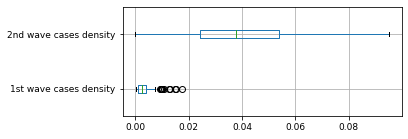

In [ ]:
plt.figure(figsize=(5, 2))
kaggle.loc[:, kaggle.columns.isin(['1st wave cases density',
                                   '2nd wave cases density'])].boxplot(rot=0, fontsize=9, vert=False)

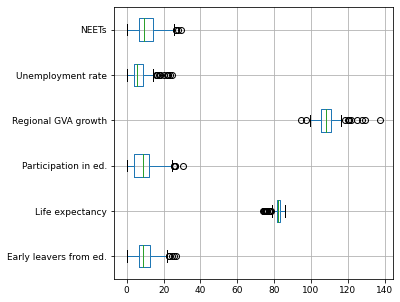

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


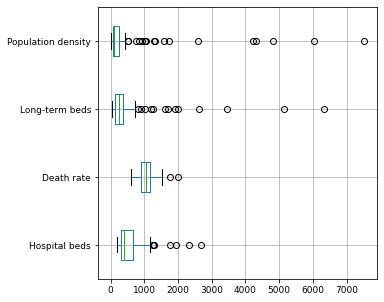

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


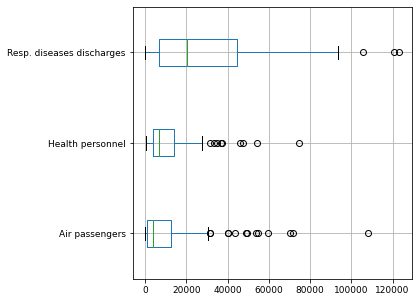

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


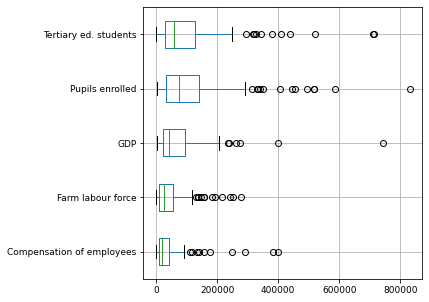

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


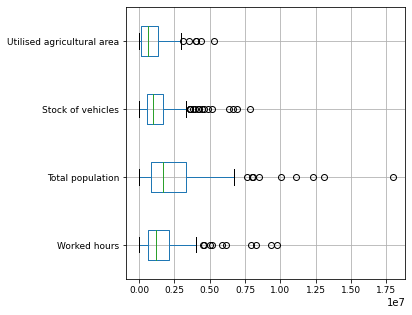

In [ ]:
plt.figure(figsize=(5, 5))
kaggle.loc[:, kaggle.columns.isin(['NEETs',
                                'Unemployment rate',
                                'Regional GVA growth',
                                'Participation in ed.',
                                'Life expectancy',
                                'Early leavers from ed.'])].boxplot(rot=0, fontsize=9, vert=False)
plt.show()

plt.figure(figsize=(5, 5))
kaggle.loc[:, kaggle.columns.isin(['Population density',
                                'Long-term beds',
                                'Death rate',
                                'Hospital beds'])].boxplot(rot=0, fontsize=9, vert=False)
plt.show()

plt.figure(figsize=(5, 5))
kaggle.loc[:, kaggle.columns.isin(['Resp. diseases discharges',
                                'Health personnel',
                                'Deaths',
                                'Air passengers'])].boxplot(rot=0, fontsize=9, vert=False)
plt.show()

plt.figure(figsize=(5, 5))
kaggle.loc[:, kaggle.columns.isin(['Tertiary ed. students',
                                'Pupils enrolled',
                                'GDP',
                                'Farm labour force',
                                'Compensation of employees'])].boxplot(rot=0, fontsize=9, vert=False)
plt.show()

plt.figure(figsize=(5, 5))
kaggle.loc[:, kaggle.columns.isin(['Utilised agricultural area',
                                'Stock of vehicles',
                                'Total population',
                                'Worked hours'])].boxplot(rot=0, fontsize=9, vert=False)
plt.show()

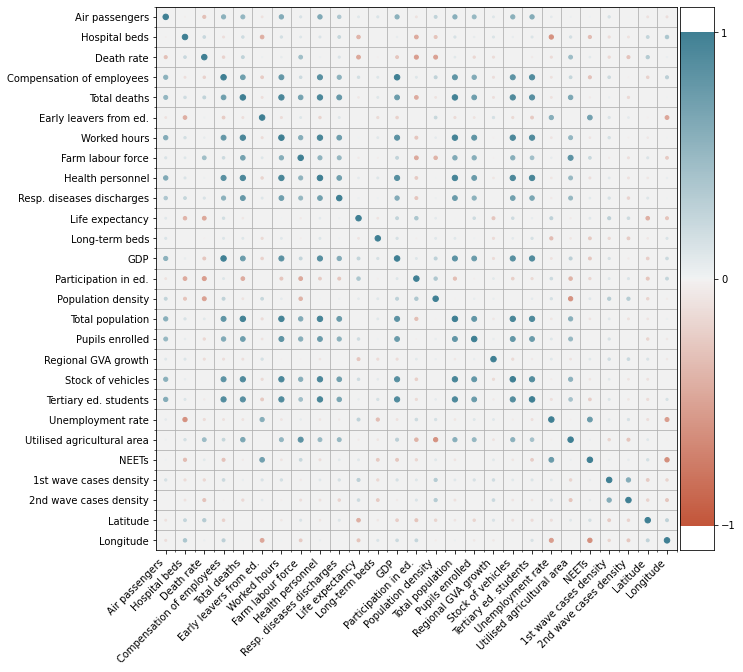

In [ ]:
!pip -q install heatmapz
from heatmap import heatmap, corrplot

c = kaggle.iloc[:, ~kaggle.columns.isin(['NUTS',
                                'binary_first_wave', 'binary_second_wave',
                                'multi_first_wave', 'multi_second_wave'])].corr(method='spearman')

plt.figure(figsize=(10, 10))
corrplot(c, size_scale=30, marker='o')
plt.show()

0    52
dtype: int64


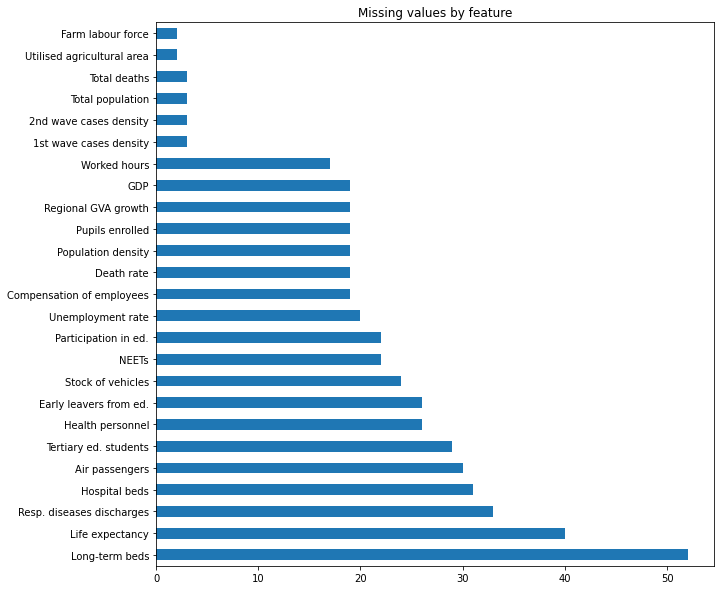

In [ ]:
nas = kaggle.iloc[:, ~kaggle.columns.isin(['binary_first_wave', 'binary_second_wave',
                                           'multi_first_wave', 'multi_second_wave'])].isnull().sum().sort_values(ascending=False) #*100/len(kaggle)
nas = pd.DataFrame(nas[nas>0])

nas.plot.barh(rot= 0, legend=False, figsize=(10,10), title='Missing values by feature')

print(nas.max())

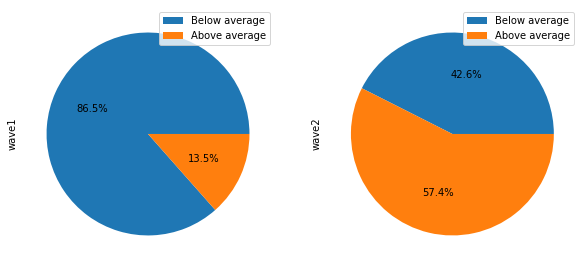

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,10))
kaggle.groupby(['binary_first_wave']).size().reset_index(name='wave1').plot.pie(y='wave1', labels=None,
                                                                                autopct='%1.1f%%', ax=axes[0])
axes[0].legend(labels=['Below average', 'Above average'])
kaggle.groupby(['binary_second_wave']).size().reset_index(name='wave2').plot.pie(y='wave2',
                                                                                 labels=None,
                                                                                 autopct='%1.1f%%', ax=axes[1])
axes[1].legend(['Below average', 'Above average'])

# Test

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
spatial = '/content/drive/MyDrive/Tesi/dataset.csv'

spatial = pd.read_csv(spatial)

spatial.head()

,NUTS,Air_passengers,Hospital_beds,Death_rate,Compensation_of_employees,Deaths,Early_leavers_from_ed.,Employment_worked_hrs.,Farm_labour_force,Health_personnel,...,Vehicles,Tertiary_ed._students,Unemployment_rate,Utilised_agricultural_area,NEET_rate,Cases_density_1,Cases_density_2,Country,Latitude,Longitude
0,AT11,NaN,587.21,1120.95,4305.0,3393,8.15,203160.0,6170,1277.0,...,254828.0,6750,4.2,181970,7.775,0.001539,0.038942,AT,47.2361,16.2874
1,AT12,31635.0,671.36,1036.91,28451.0,17449,7.70,1179290.0,30660,7919.0,...,1378944.0,33152,4.2,908850,7.000,0.002208,0.039038,AT,48.2589,15.7601
2,AT13,NaN,751.91,857.68,48625.0,16150,10.60,1662610.0,2110,13078.0,...,799636.0,192471,10.6,8020,9.900,0.003531,0.042492,AT,48.2028,16.3932
3,AT21,210.0,803.93,1081.98,10099.0,6031,8.15,438030.0,7530,2722.0,...,438684.0,15527,4.7,220340,7.900,0.001083,0.049172,AT,46.7161,14.4629
4,AT22,1035.0,801.30,1003.76,24503.0,12691,5.70,1023160.0,21440,6489.0,...,947061.0,62035,4.4,375180,7.600,0.001845,0.041521,AT,47.1818,15.5247


In [ ]:
df = pd.DataFrame(spatial['NUTS'])

# Cases density by mean

df['wave1_high'] = spatial['Cases_density_1'].apply(lambda no: no >= spatial['Cases_density_1'].mean()).astype("int64")
df['wave1_low'] = 1 - df['wave1_high']

df['wave2_high'] = spatial['Cases_density_2'].apply(lambda no: no >= spatial['Cases_density_2'].mean()).astype("int64")
df['wave2_low'] = 1 - df['wave2_high']

# Features by median

df["over_" + spatial.columns[1:len(spatial.columns)-5]] = spatial.iloc[:, 1:len(spatial.columns)-5].apply(lambda column: column >= column.median()).astype("int64")

# LASSO filter

df1 = df.loc[:, ~df.columns.isin(['wave2_high','wave2_low', 'over_Air_passengers',
                                  'over_Deaths', 'over_Health_personnel', 'over_Gross_domestic_product', 'over_Unemployment_rate', 'over_Utilised_agricultural_area'])]
df2 = df.loc[:, ~df.columns.isin(['wave1_high','wave1_low', 'over_Air_passengers',
                                  'over_Health_personnel', 'over_Gross_domestic_product', 'over_Population', 'over_Tertiary_ed._students'])]

# Add negatives

df1["not_" + df1.columns[3:len(df1.columns)]] = 1 - df1[df1.columns[3:len(df1.columns)]]
df2["not_" + df2.columns[3:len(df2.columns)]] = 1 - df2[df2.columns[3:len(df2.columns)]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('arules', verbose=F, quiet=T)
library(arules)

genes_to_transactions <- function(data){
  # Data formatting and collecting
  names_data <- names(data[-c(1)])
  matrix_data <- matrix(unlist(data[-c(1)]), ncol=dim(data[-c(1)])[2], nrow=dim(data[-c(1)])[1])
  colnames(matrix_data) <- names_data
  # Use the constructor to create transactions
  trans <- transactions(matrix_data)
  return(trans)
}

grid_search <- function(dat, lab){
  supports <- c(0.02, 0.05, 0.1, 0.2)  # 0.007, 0.01 give too many rules in general
  confidences <- c(0.6, 0.7, 0.8, 0.9)  # 0.5 gives too many rules in general
  stats <- data.frame(support=double(), confidence=double(), pvalue=double(), rules=integer(), stringsAsFactors=F)
  for(i in 1:length(supports)){
      for(j in 1:length(confidences)){
          #extract rules
          mined_rules <- apriori(data = dat,
                           parameter = list(supp=supports[i], conf=confidences[j], minlen=3),
                           appearance = list(rhs=grep(lab, itemLabels(dat), value=TRUE)),  # no lhs or crashes
                           control = list(verbose=F))
          #compute p-value
          quality(mined_rules) <- cbind(quality(mined_rules),
                                  pval = interestMeasure(mined_rules, measure="fishersExactTest", transactions=dat, reuse=TRUE))  # adjust='none'
          #extract median lift and pvalue and store number of extracted rules
          pval <- median(quality(mined_rules)$pval)  # no \ for \$pval
          lifting <- median(quality(mined_rules)$lift)  # added because there wasn't
          counter <- length(mined_rules)
          #add elements to dataframe
          stats <- rbind(stats, data.frame(support=supports[i], confidence=confidences[j], pvalue=pval, lift=lifting, count=counter))
  }}
  return(stats)
}

ar_mine <- function(train, sup, con, lab){
  # Mine all rules using apriori
  rules <- apriori(data = train,
                  parameter = list(supp=sup, conf=con, minlen=3),
                  appearance = list(rhs=grep(lab, itemLabels(train), value=TRUE)),  # no lhs = items ,
                  control = list(verbose=F))
  # Keep statistically significant rules on the train set, without correction
  sig_rules <- rules[is.significant(rules, train, method='fisher', alpha=0.05, adjust='none')]
  # Calculate p-value on the Test Set
  quality(sig_rules) <- cbind(quality(sig_rules),
                            pvalue_test = interestMeasure(sig_rules, measure="fishersExactTest", transactions=train, reuse=FALSE))  # adjust='none',
  # Select statistically significant rules, using Bonferroni correction
  final_rules <- subset(sig_rules, pvalue_test < 0.05/length(sig_rules))  # Bonferroni = alpha/n_tests
  print('Mining successful')
  return(final_rules)
}

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘arules’


R[write to console]: The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
%R -i df1
%R -i df2

%R items_1 <- genes_to_transactions(df1)
%R items_2 <- genes_to_transactions(df2)

<rpy2.robjects.methods.RS4 object at 0x7f08418b1370> [RTYPES.S4SXP]
R classes: ('transactions',)

In [ ]:
# Severity

#%R grid_search(items_1, "wave1_high")  # 0.1, 0.8
#%R grid_search(items_2, "wave2_high") # 0.2, 0.8

# Mildness

#%R grid_search(items_1, "wave1_low") # 0.2, 0.9
%R grid_search(items_2, "wave2_low") # 0.2, 0.8

,support,confidence,pvalue,lift,count
1,0.02,0.6,0.122222,2.000000,985200
2,0.02,0.7,0.122222,2.000000,849545
3,0.02,0.8,0.104128,2.000000,688722
4,0.02,0.9,0.059733,2.000000,565222
5,0.05,0.6,0.006643,2.000000,137544
6,0.05,0.7,0.006643,2.000000,127357
7,0.05,0.8,0.006643,2.000000,109540
8,0.05,0.9,0.003141,2.000000,80191
9,0.10,0.6,0.017186,1.473684,3668
10,0.10,0.7,0.003951,1.600000,2365


In [ ]:
%%R

severity1 <- ar_mine(items_1, 0.1, 0.8, "wave1_high")
severity2 <- ar_mine(items_2, 0.2, 0.8, "wave2_high")

mildness1 <- ar_mine(items_1, 0.2, 0.9, "wave1_low")
mildness2 <- ar_mine(items_2, 0.2, 0.8, "wave2_low")

inspect(severity1)
inspect(mildness1)
inspect(severity2)
inspect(mildness2)

[1] "Mining successful"
[1] "Mining successful"
[1] "Mining successful"
[1] "Mining successful"
    lhs                                  rhs            support confidence coverage     lift count pvalue_test
[1] {over_Compensation_of_employees,                                                                          
     over_Employment_worked_hrs.,                                                                             
     over_Pupils_enrolled,                                                                                    
     over_GVA_growth}                 => {wave1_high} 0.1029412  0.8235294    0.125 2.545455    14 8.36552e-06
[2] {over_Compensation_of_employees,                                                                          
     over_Population,                                                                                         
     over_Pupils_enrolled,                                                                                    
     over_GVA_gr